In [370]:
import pickle
import pandas as pd
import numpy as np
from itertools import combinations
from functools import reduce
from collections import defaultdict

In [371]:
from matplotlib import pyplot as plt

import matplotlib.font_manager
#plt.style.use(['dark_background'])
plt.rcParams['figure.figsize'] = [15, 9]
# Set general font size
plt.rcParams['font.size'] = '24'
plt.rcParams['savefig.dpi'] = 200
# plt.rcParams['font.family'] = 'DeJavu Serif'
#plt.rcParams['font.serif'] = ['Helvetica']
#plt.rc('font', family='Dejavu Sans')
plt.rc('font', family='sans-serif')
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

matplotlib.rcParams.update({'font.size': 24})
mpl.rcParams['figure.dpi'] = 200
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
#rc('text', usetex=True)
plt_colors = ['cornflowerblue', 'crimson', 'forestgreen', 'mediumorchid']

plt.style.use('seaborn-deep')
plt.style.use('seaborn-talk')

/var/folders/yq/3cv6zh6d1bn3rphptqpcqdkm0000gn/T/ipykernel_48015/1004321453.py:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')
/var/folders/yq/3cv6zh6d1bn3rphptqpcqdkm0000gn/T/ipykernel_48015/1004321453.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


In [372]:
from qiskit.providers.fake_provider import FakeLagosV2
backend = FakeLagosV2()

# backend._conf_dict

In [373]:
from qiskit import QuantumCircuit, transpile, schedule
from qiskit.visualization.timeline import draw, IQXSimple, IQXDebugging
from qiskit.providers.fake_provider import FakeJakarta

qc = QuantumCircuit(4)
qc.h(3)
qc.cx(1,3)
qc.h(3)
qc = transpile(qc, FakeJakarta(), scheduling_method='alap')
draw(qc).savefig('1_3_timeline_diagram.pdf')


In [446]:
from qiskit import QuantumCircuit, transpile, schedule
from qiskit.visualization.timeline import draw, IQXSimple, IQXDebugging
from qiskit.providers.fake_provider import FakeLagosV2
from qiskit.visualization import plot_error_map


qc = QuantumCircuit(4)
qc.h(3)
qc.cx(1,3)
qc.h(3)
qc = transpile(qc, FakeJakarta(), scheduling_method='alap')
draw(qc).savefig('1_3_timeline_diagram.pdf')


In [ ]:
counts = {}

In [375]:
from qiskit import QuantumCircuit, transpile, schedule
from qiskit.visualization.timeline import draw
from qiskit.providers.fake_provider import FakeJakarta
 
qc = QuantumCircuit(7)
qc.cx(0,1)
qc.cx(1,2)
 
qc = transpile(qc, FakeJakarta(), scheduling_method='alap')
draw(qc).savefig('01_12_timeline_diagram.pdf')

In [378]:
plt.plot([3,4,5,6], IDEAL, label='IDEAL', marker='<', color='blue', linestyle='--', markersize=15)
plt.plot([3,4,5,6], MEAS_ERR, label='only measurement error',  marker='*', color='grey', linestyle='--', markersize=20)
plt.plot([3,4,5,6], CROSS_TALK, label='crosstalk + measurement error',  marker='>', color='black', linestyle='--', markersize=15)
plt.xticks([3,4,5,6])
plt.grid()
plt.legend(ncol=1, loc='upper center', fontsize=24)
plt.xlabel('measured qubit number', fontsize=24)
plt.ylabel('Zero Counts on idle qubits', fontsize=24)
plt.savefig('../figures/crosstalk_overview.pdf')
plt.close()


In [552]:
#CNOT Zero Counts data

single_CNOT_counts = defaultdict(dict)
single_CNOT_counts_error_bars = defaultdict(dict)

double_CNOT_counts = defaultdict(dict)
double_CNOT_counts_error_bars = defaultdict(dict)

single_CNOT_counts[(1,3,5)] = {0: [9868.573333333334, 9864.506666666666, 9869.32, 9867.786666666667], 2: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9522.173333333334, 9523.493333333334, 9518.72, 9524.44], 6: [10000.0, 10000.0, 10000.0, 10000.0]}
single_CNOT_counts_error_bars[(1,3,5)] = {0: [9.659776855025632, 11.819050535282248, 11.88854911248635, 12.20305244145451], 2: [0.0, 0.0, 0.0, 0.0], 3: [22.498813795892044, 23.343449235753962, 22.744118653694482, 20.484947319108894], 4: [0.0, 0.0, 0.0, 0.0], 6: [0.0, 0.0, 0.0, 0.0]}

double_CNOT_counts[(1,3,5)] = {0: [9866.46, 9865.76, 9867.0, 9864.98, 9867.14, 9870.52], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 4: [9748.58, 9746.54, 9743.5, 9749.58, 9740.2, 9749.52], 6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]}
double_CNOT_counts_error_bars[(1,3,5)] =  {0: [12.601920488560465, 11.325299113047743, 9.664367542679656, 11.446379340210598, 12.06318365938279, 10.20831034011016], 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 4: [14.225456055958277, 16.966095602701287, 15.608010763707206, 15.269695478299493, 15.046594299043223, 13.986050192960127], 6: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

single_CNOT_counts[(4,5,6)] = {0: [10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [9894.36, 9894.68, 9894.546666666667, 9896.146666666667]}
single_CNOT_counts_error_bars[(4,5,6)] = {0: [0.0, 0.0, 0.0, 0.0], 1: [0.0, 0.0, 0.0, 0.0], 2: [0.0, 0.0, 0.0, 0.0], 3: [10.279610887577409, 11.623149315052267, 9.992388214146917, 8.81921135300027]}

double_CNOT_counts[(4,5,6)] = {0: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 3: [9885.16, 9887.5, 9884.9, 9883.4, 9885.92, 9883.74]}
double_CNOT_counts_error_bars[(4,5,6)] = {0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 3: [10.335105224428052, 9.930256794262673, 11.475626344561764, 11.278297743897348, 10.146605343660509, 8.039427840337893]}

single_CNOT_counts[(0,1,2)] = {3: [9872.693333333333, 9870.653333333334, 9875.613333333333, 9874.48], 4: [9770.973333333333, 9772.373333333333, 9768.626666666667, 9772.226666666667], 5: [9521.12, 9522.346666666666, 9526.893333333333, 9525.76], 6: [9889.04, 9890.96, 9890.013333333334, 9892.053333333333]}
single_CNOT_counts_error_bars[(0,1,2)] =  {3: [13.289568172902467, 11.952677059508003, 11.83879873786, 10.126348469874683], 4: [14.20326097141858, 12.122456663381213, 15.4175426778142, 12.572534439094696], 5: [21.555484994157133, 22.426468489017367, 21.60652576319376, 20.377660971433073], 6: [8.592151457386366, 9.975222637448583, 10.25734641881396, 10.72553754156665]}

double_CNOT_counts[(0,1,2)] = {3: [9869.26, 9871.56, 9872.78, 9870.6, 9869.56, 9873.84], 4: [9813.26, 9816.0, 9816.46, 9816.52, 9811.74, 9813.84], 5: [9697.06, 9691.44, 9691.14, 9690.28, 9697.52, 9692.78], 6: [9875.8, 9872.8, 9872.54, 9875.32, 9874.6, 9873.88]}
double_CNOT_counts_error_bars[(0,1,2)] = {3: [10.701046677778768, 11.458027753501037, 11.386465650060163, 10.838819123871383, 11.872927187513618, 11.018820263530937], 4: [12.409367429486483, 15.585891055695212, 12.62253540300046, 14.129741681998295, 14.975727027426748, 13.008243540155604], 5: [15.339374172370919, 17.075315516850633, 19.41031684440004, 18.693357108876942, 14.318156305893579, 18.774759652256535], 6: [8.863407922464136, 12.222929272478016, 10.581512179268142, 11.223974340669173, 10.68831137270991, 11.17790678078861]}

no_CNOT_counts = defaultdict(dict)
no_CNOT_counts_error_bars = defaultdict(dict)

no_CNOT_counts[(0,1,2)] = {3: [9966.26], 4: [9930.26], 5: [9850.06], 6: [9949.8]}
no_CNOT_counts_error_bars[(0,1,2)] = {3: [4.42], 4: [7.40], 5: [10.44], 6: [6.75]}

swap_counts = defaultdict(dict)
swap_counts_error_bars = defaultdict(dict)

swap_counts[(5,3,1)] =  {0: [9863.106666666667, 9862.56, 9862.88, 9863.76], 2: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9647.586666666666, 9652.24, 9645.946666666667, 9651.293333333333], 6: [10000.0, 10000.0, 10000.0, 10000.0]}
swap_counts_error_bars[(5,3,1)] = {0: [11.921491331018764, 11.702125163120302, 11.75296841936822, 12.543088402250328], 2: [0.0, 0.0, 0.0, 0.0], 4: [16.784193622439997, 18.047965721007635, 18.093750916330816, 19.15116938698232], 6: [0.0, 0.0, 0.0, 0.0]}

swap_counts[(5,3,1)] = {0: [9863.84, 9862.28, 9864.66, 9863.2, 9865.06, 9862.94], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 4: [9694.46, 9661.24, 9678.18, 9659.4, 9676.1, 9649.04], 6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]}
swap_counts_error_bars[(5,3,1)] = {0: [9.996719461903488, 10.459521977604904, 10.651966954511265, 13.392535234226568, 10.40655562614259, 11.017095806064319], 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 4: [22.24428915474711, 20.15892854295585, 17.2205574822652, 17.9510445378535, 15.1, 17.33662020118108], 6: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


In [380]:
cm = [(0,1), (1,0), (1,2), (2,1), (1,3), (3,1), (3,5), (5,3), (4,5), (5,4), (5,6), (6,5)]

exp_name: CNOT on Victim qubits (0, 1, 2)
[0, 1, 2]
{3: [9966.26], 4: [9930.26], 5: [9850.06], 6: [9949.8]}
{3: [9869.26, 9871.56, 9872.78, 9870.6, 9869.56, 9873.84], 4: [9813.26, 9816.0, 9816.46, 9816.52, 9811.74, 9813.84], 5: [9697.06, 9691.44, 9691.14, 9690.28, 9697.52, 9692.78], 6: [9875.8, 9872.8, 9872.54, 9875.32, 9874.6, 9873.88]}
3
4
5
6


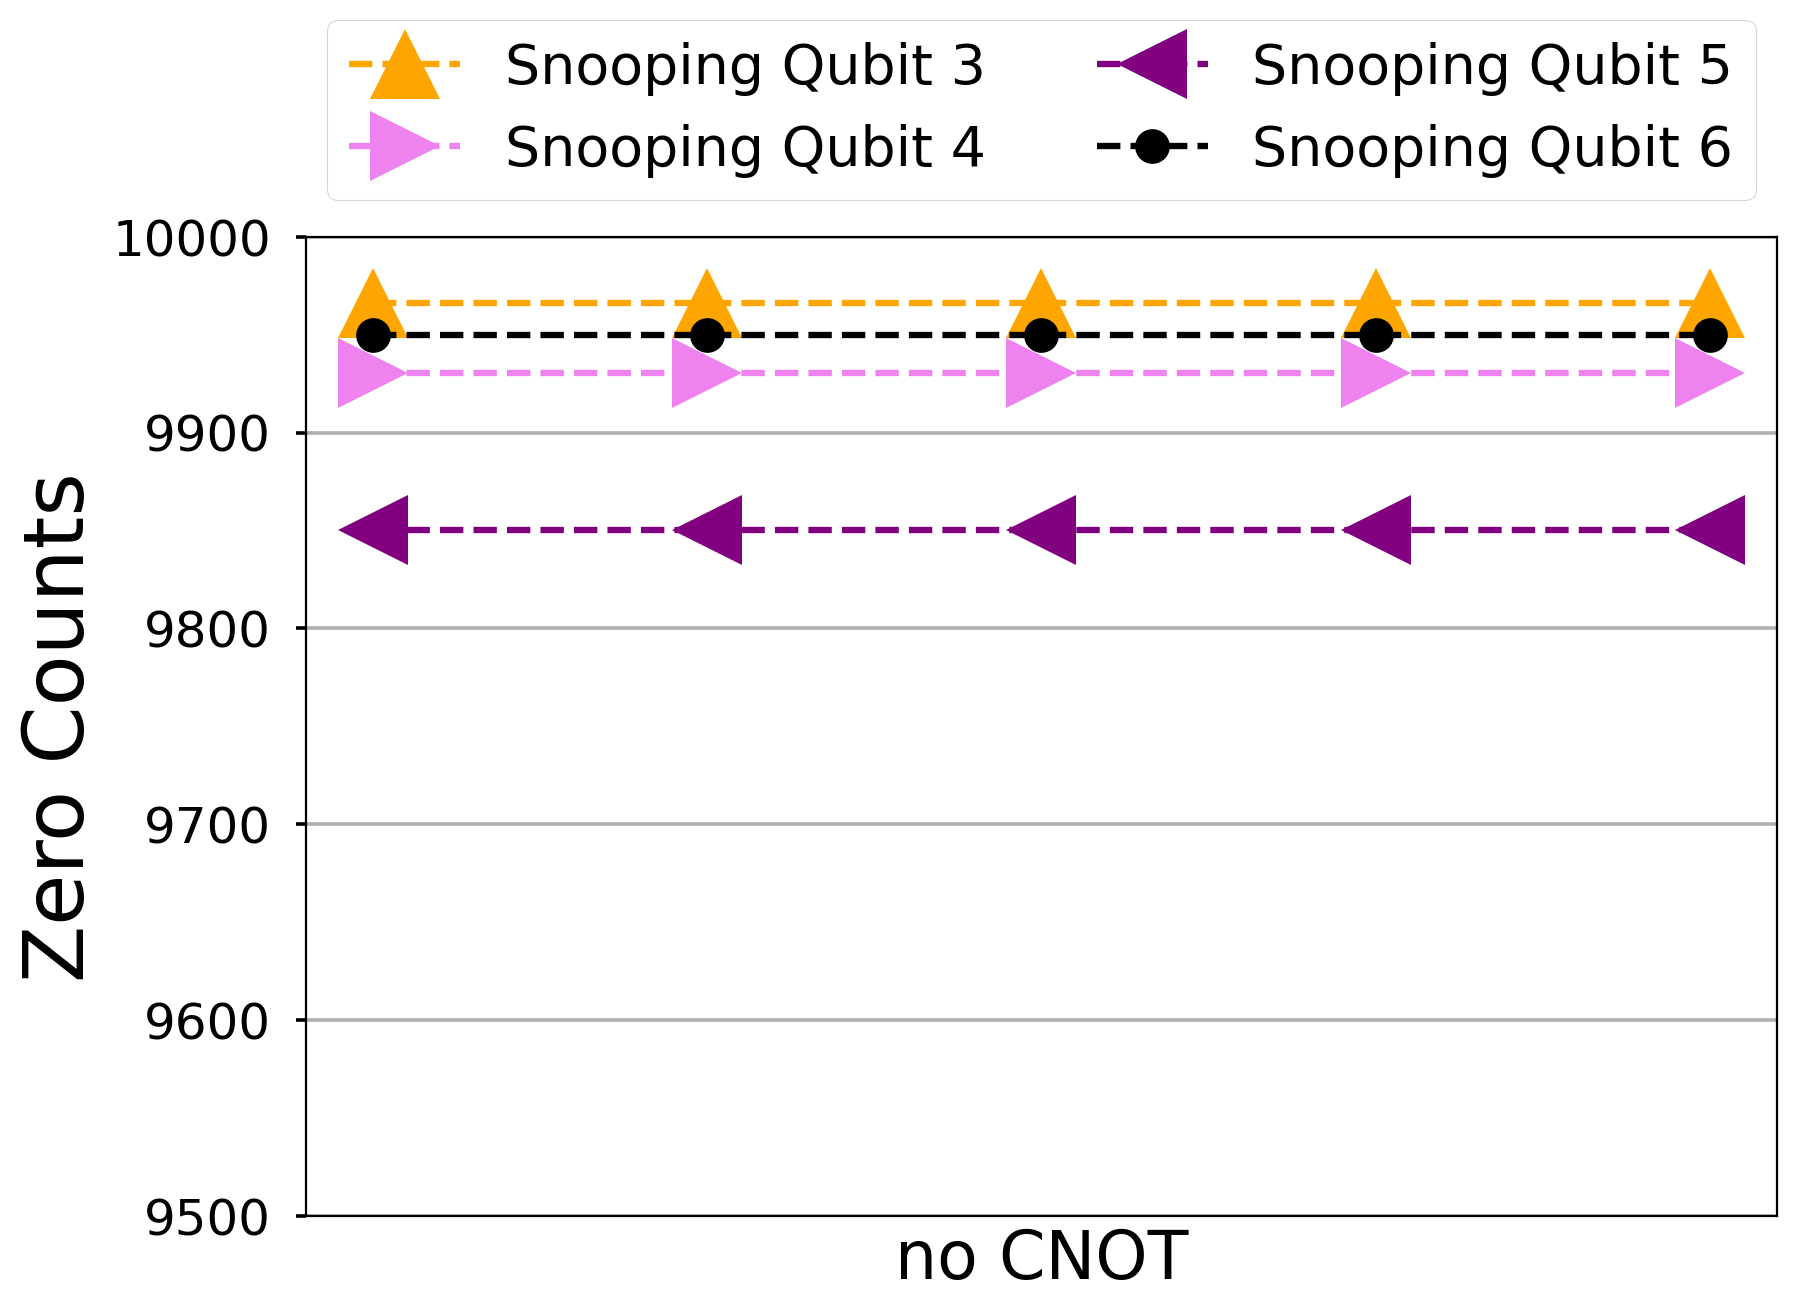

In [720]:
## Figure 2; Explaining the setup and the plots


colors = ['red', 'blue', 'green', 'orange', 'violet', 'purple', 'black']
markers = ['.', '*', '+', '^', '>', '<', '.']
for k in no_CNOT_counts.keys():
    print(f'exp_name: CNOT on Victim qubits {k}')
    
    snooping_qubits = []
    
    vic_qubs = list(k)
    print(vic_qubs)
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    
    cnot_pos = list(filter(lambda k: k[0] in vic_qubs and k[1] in vic_qubs, cm))

    data_single = no_CNOT_counts[k]
    data_double = double_CNOT_counts[k]
    print(data_single)
    print(data_double)
    plt.figure().set_figheight(7)
    for key in data_single.keys():
        print(key)
        plt.plot(range(len(data_single[key])*5), [data_single[key]]*5, c=colors[key],  
                 marker=markers[key], linestyle='--',
                 label=f"Snooping Qubit {key}", markersize=25)
        # plt.errorbar(range(len(data_single[key])), data_single[key], label=f"Snooping Qubit {key}",
        #              yerr=no_CNOT_counts_error_bars[k][key],
        #              c=colors[key], fmt ='--', capsize=5,  marker=markers[key], markersize=25)
    # combs = list(combinations(cnot_pos, 1))
    # combs = [v[0] for v in combs]
    plt.xticks([])
    # plt.ylim([9500, 10000])
    # plt.xticks([0,1,2,3], list(combs), fontsize=18, rotation=20)
    plt.yticks(fontsize=18)
    # plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    # plt.title(f"victim qubits {k} with single CNOT between them")
    plt.grid()
    plt.legend(ncol=2, loc='upper center', fontsize=20, bbox_to_anchor=(0.5, 1.25))
    plt.tight_layout()
    plt.xlabel('no CNOT', fontsize=24)
    plt.ylabel('Zero Counts on Snooping Qubit', fontsize=24)
    plt.ylim([9500, 10000])
    
    # plt.show()
    plt.subplots_adjust(left=0.3, right=0.8, top=1, bottom=0.35)

    # plt.legend(ncol=2, fontsize=24)
    plt.tight_layout()
    # plt.xlabel('CNOT (control, target) qubit pair used', fontsize=24)
    plt.ylabel('Zero Counts', fontsize=30)
    
    
    # plt.show()
    plt.savefig(f"../figures/no_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.svg")
    plt.savefig(f"../figures/no_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.pdf")
    plt.show()
    plt.close()

exp_name: CNOT on Victim qubits (1, 3, 5)
[1, 3, 5]
{0: [9868.573333333334, 9864.506666666666, 9869.32, 9867.786666666667], 2: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9522.173333333334, 9523.493333333334, 9518.72, 9524.44], 6: [10000.0, 10000.0, 10000.0, 10000.0]}
{0: [9866.46, 9865.76, 9867.0, 9864.98, 9867.14, 9870.52], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 4: [9748.58, 9746.54, 9743.5, 9749.58, 9740.2, 9749.52], 6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]}
0
2
4
6


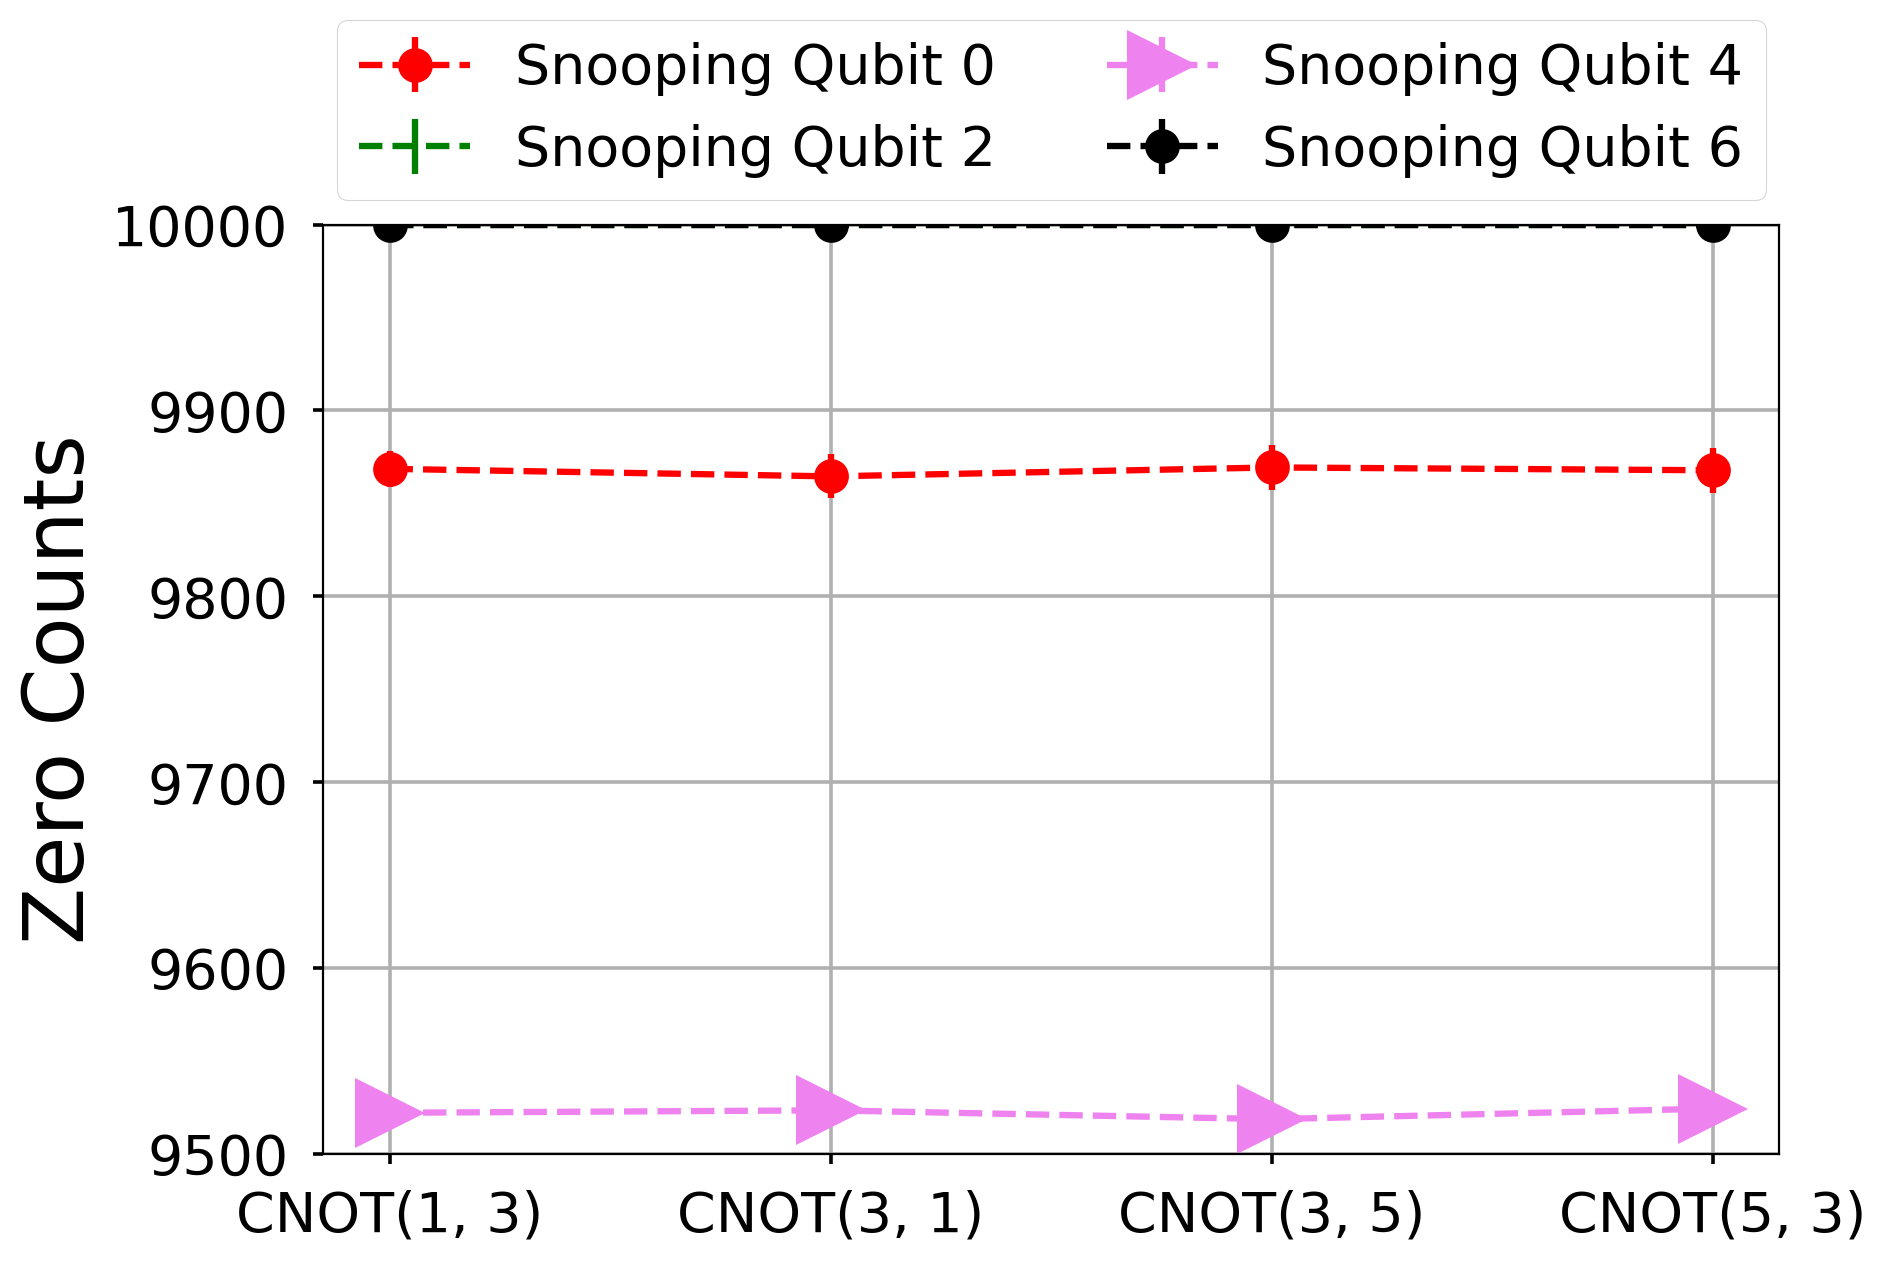

exp_name: CNOT on Victim qubits (4, 5, 6)
[4, 5, 6]
{0: [10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [9894.36, 9894.68, 9894.546666666667, 9896.146666666667]}
{0: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 3: [9885.16, 9887.5, 9884.9, 9883.4, 9885.92, 9883.74]}
0
1
2
3


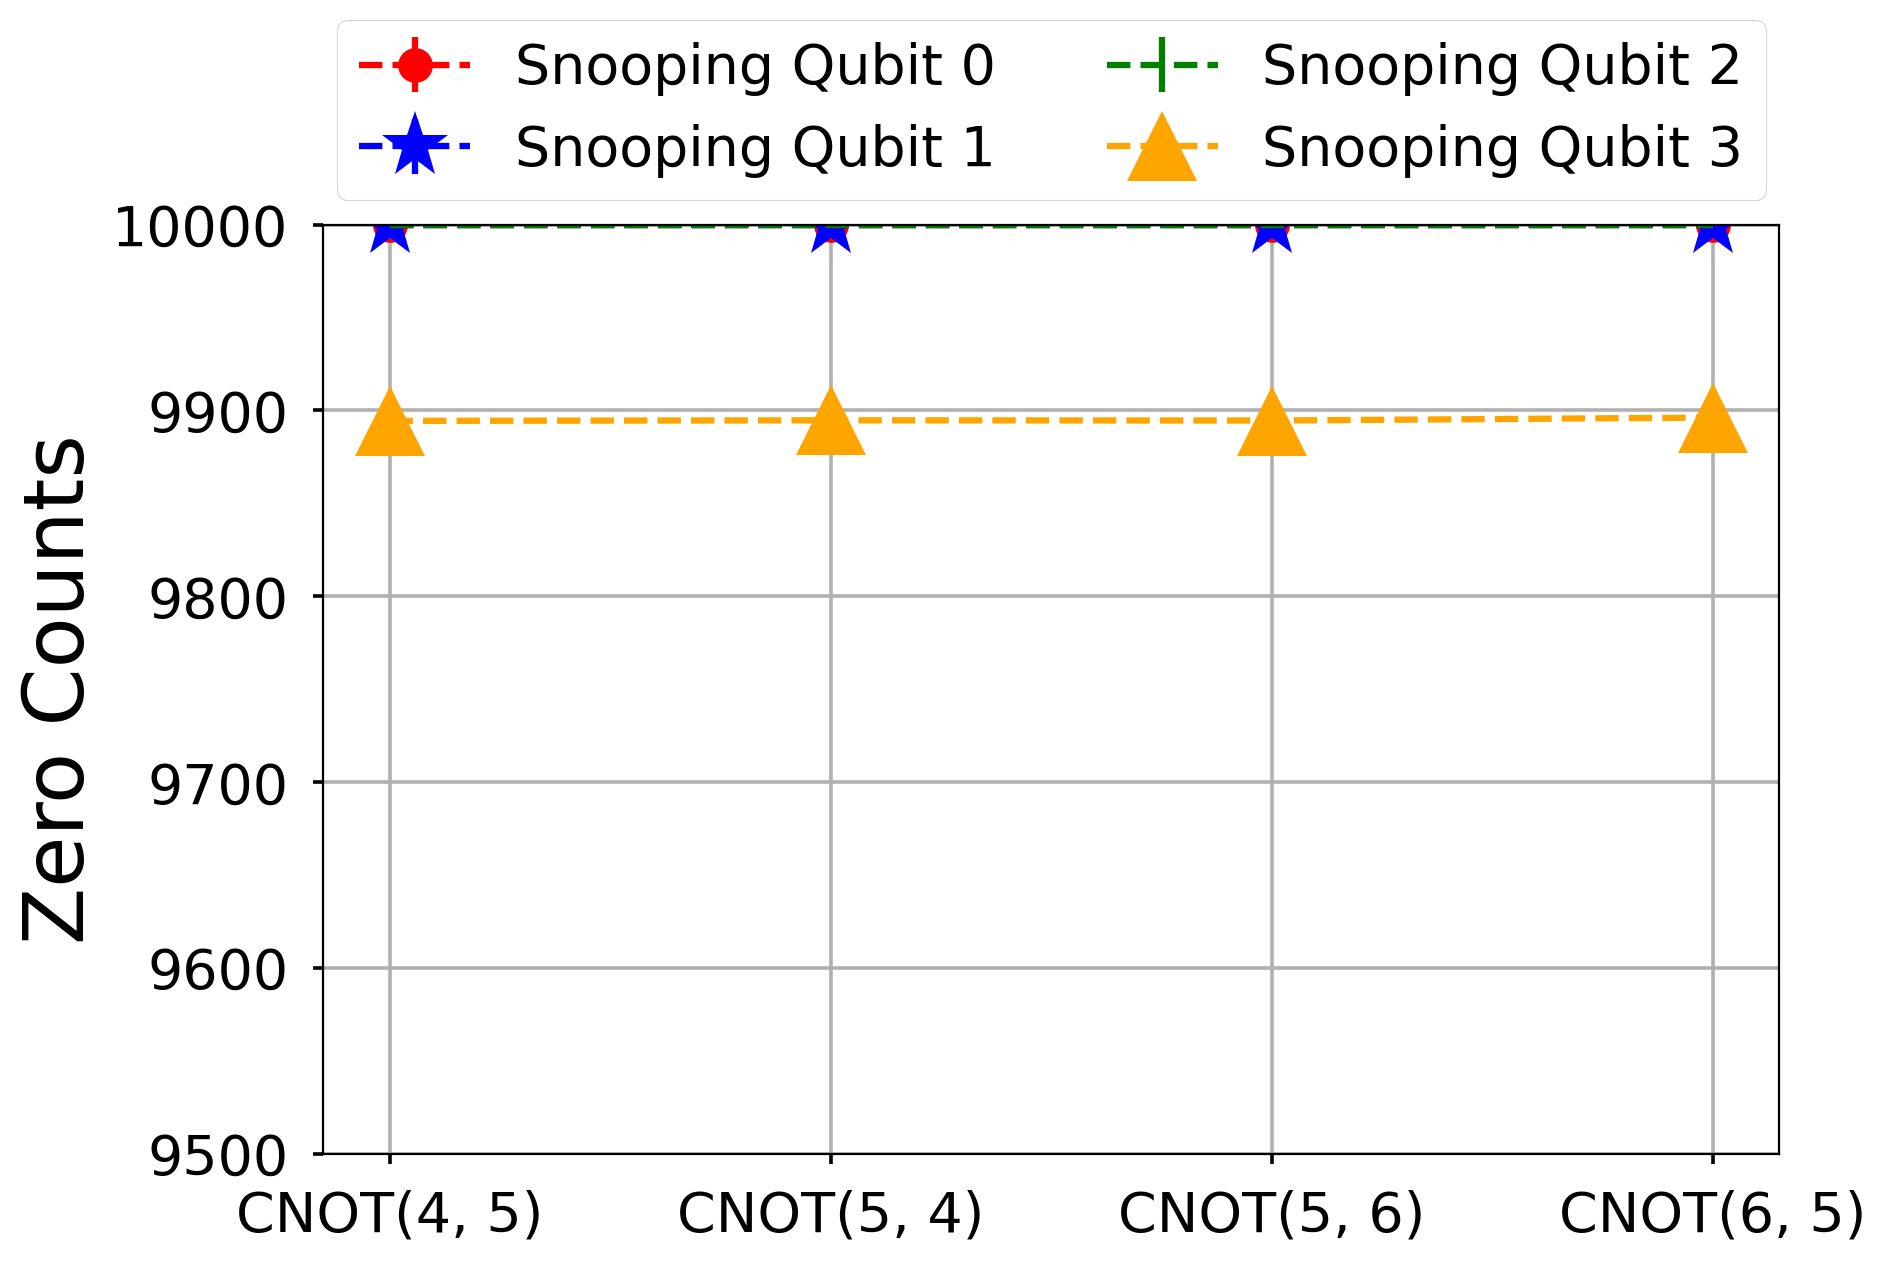

exp_name: CNOT on Victim qubits (0, 1, 2)
[0, 1, 2]
{3: [9872.693333333333, 9870.653333333334, 9875.613333333333, 9874.48], 4: [9770.973333333333, 9772.373333333333, 9768.626666666667, 9772.226666666667], 5: [9521.12, 9522.346666666666, 9526.893333333333, 9525.76], 6: [9889.04, 9890.96, 9890.013333333334, 9892.053333333333]}
{3: [9869.26, 9871.56, 9872.78, 9870.6, 9869.56, 9873.84], 4: [9813.26, 9816.0, 9816.46, 9816.52, 9811.74, 9813.84], 5: [9697.06, 9691.44, 9691.14, 9690.28, 9697.52, 9692.78], 6: [9875.8, 9872.8, 9872.54, 9875.32, 9874.6, 9873.88]}
3
4
5
6


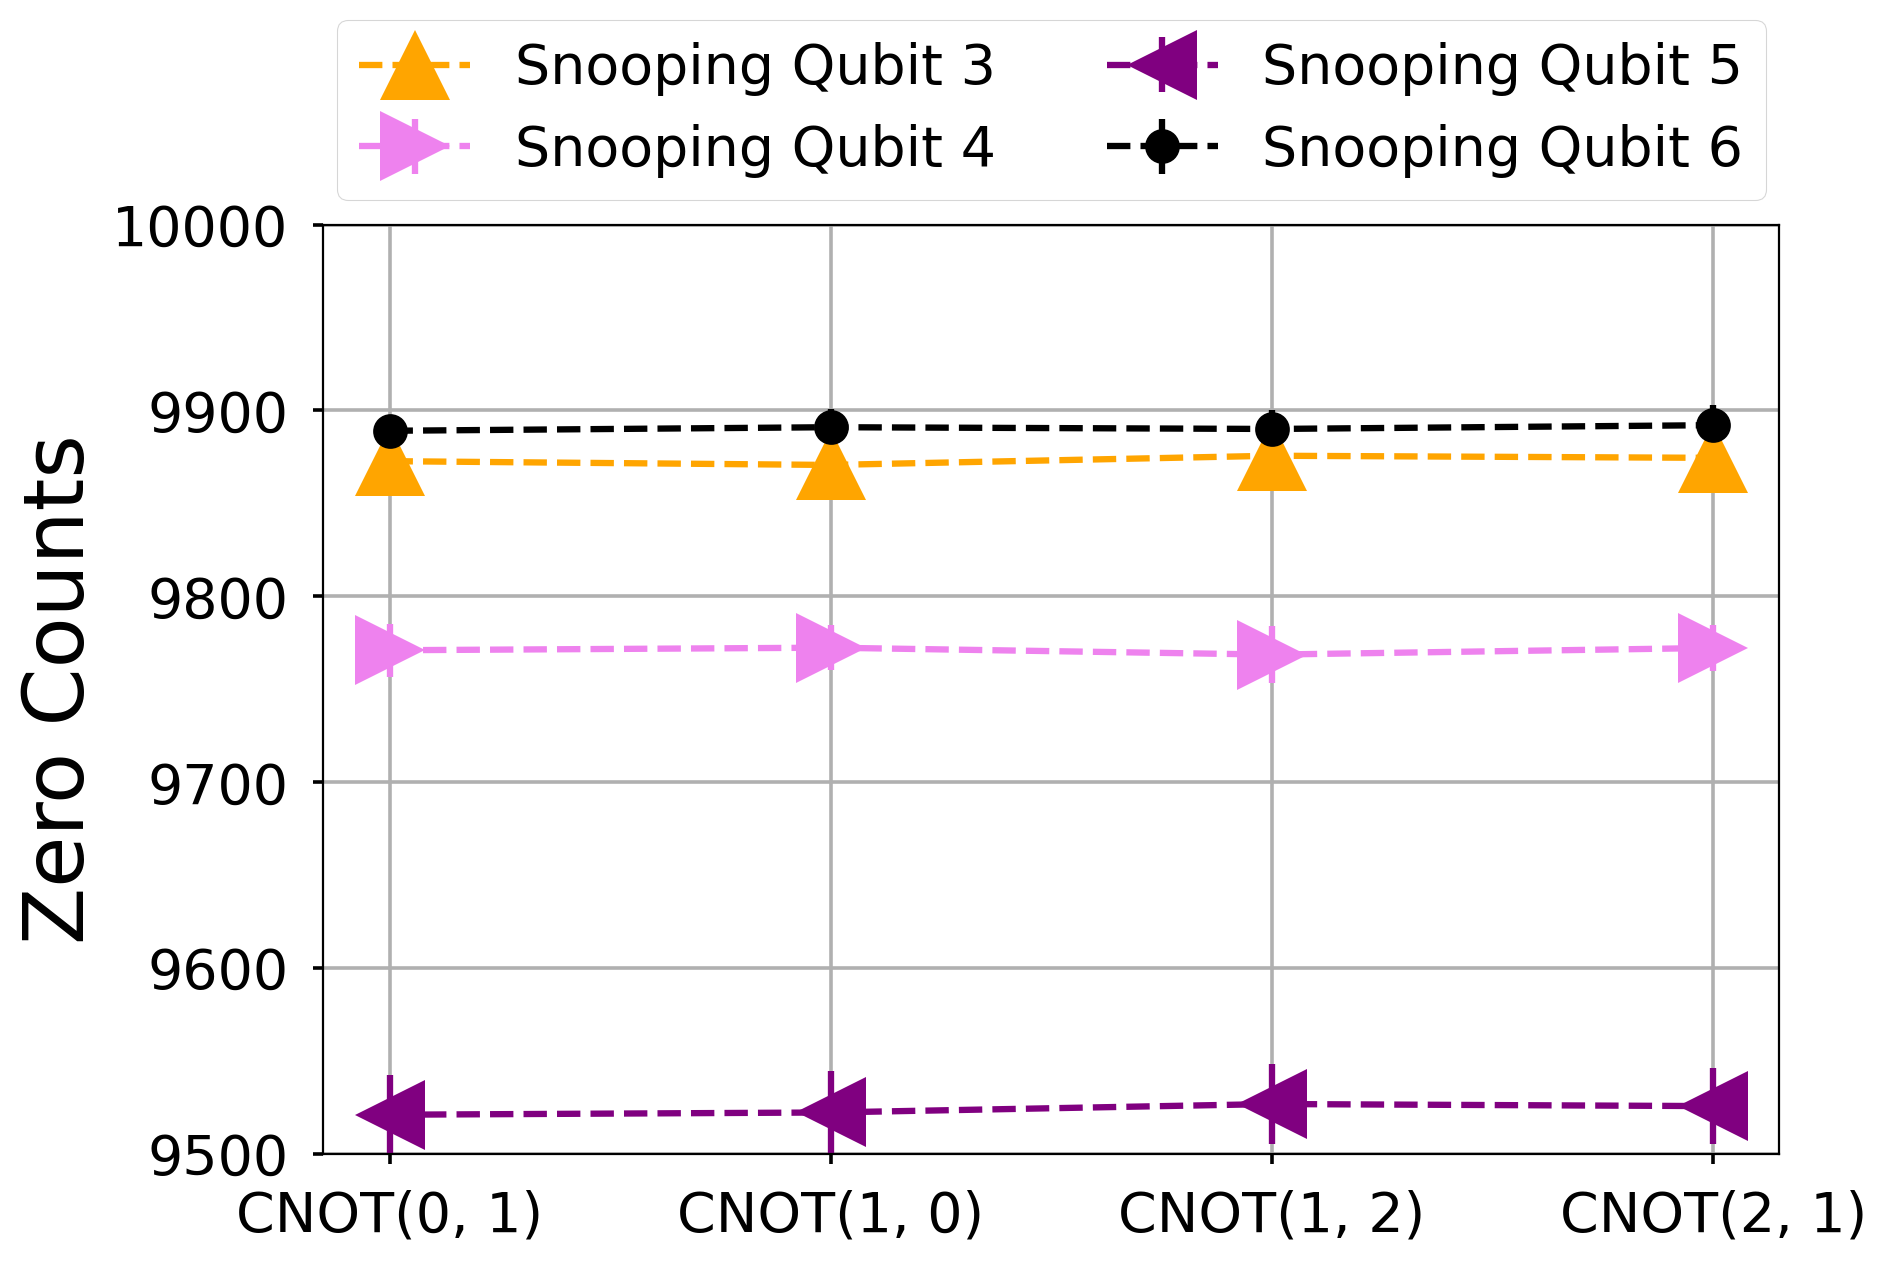

In [718]:
## Figure 2; Explaining the setup and the plots


colors = ['red', 'blue', 'green', 'orange', 'violet', 'purple', 'black']
markers = ['.', '*', '+', '^', '>', '<', '.']
for k in single_CNOT_counts.keys():
    print(f'exp_name: CNOT on Victim qubits {k}')
    
    snooping_qubits = []
    
    vic_qubs = list(k)
    print(vic_qubs)
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    
    cnot_pos = list(filter(lambda k: k[0] in vic_qubs and k[1] in vic_qubs, cm))

    data_single = single_CNOT_counts[k]
    data_double = double_CNOT_counts[k]
    print(data_single)
    print(data_double)
    
    for key in data_single.keys():
        print(key)
        plt.scatter(range(len(data_single[key])), data_single[key], c=colors[key],  marker=markers[key])
        plt.errorbar(range(len(data_single[key])), data_single[key], label=f"Snooping Qubit {key}",
                     yerr=single_CNOT_counts_error_bars[k][key],
                     c=colors[key], fmt ='--', capsize=5,  marker=markers[key], markersize=25)
    combs = list(combinations(cnot_pos, 1))
    combs = [v[0] for v in combs]
    plt.xticks([0,1,2,3], [f'CNOT{v}' for v in list(combs)], fontsize=20, rotation=0)
    plt.yticks(fontsize=20)
    
    # plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    # plt.title(f"victim qubits {k} with single CNOT between them")
    plt.grid()

    plt.legend(ncol=2, loc='upper center', fontsize=20, bbox_to_anchor=(0.5, 1.25))
    plt.tight_layout()
    # plt.xlabel('CNOT (control, target) qubit pair used', fontsize=24)
    plt.ylabel('Zero Counts', fontsize=30)
    plt.ylim([9500, 10000])
    
    # plt.show()
    plt.subplots_adjust(left=0.2, right=0.9, top=0.8, bottom=0.15)
    plt.savefig(f"../figures/single_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.svg")
    plt.savefig(f"../figures/single_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.pdf")
    plt.show()
    plt.close()

exp_name: CNOT on Victim qubits (1, 3, 5)
[1, 3, 5]
{0: [9868.573333333334, 9864.506666666666, 9869.32, 9867.786666666667], 2: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9522.173333333334, 9523.493333333334, 9518.72, 9524.44], 6: [10000.0, 10000.0, 10000.0, 10000.0]}
{0: [9866.46, 9865.76, 9867.0, 9864.98, 9867.14, 9870.52], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 4: [9748.58, 9746.54, 9743.5, 9749.58, 9740.2, 9749.52], 6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]}
0
2
4
6


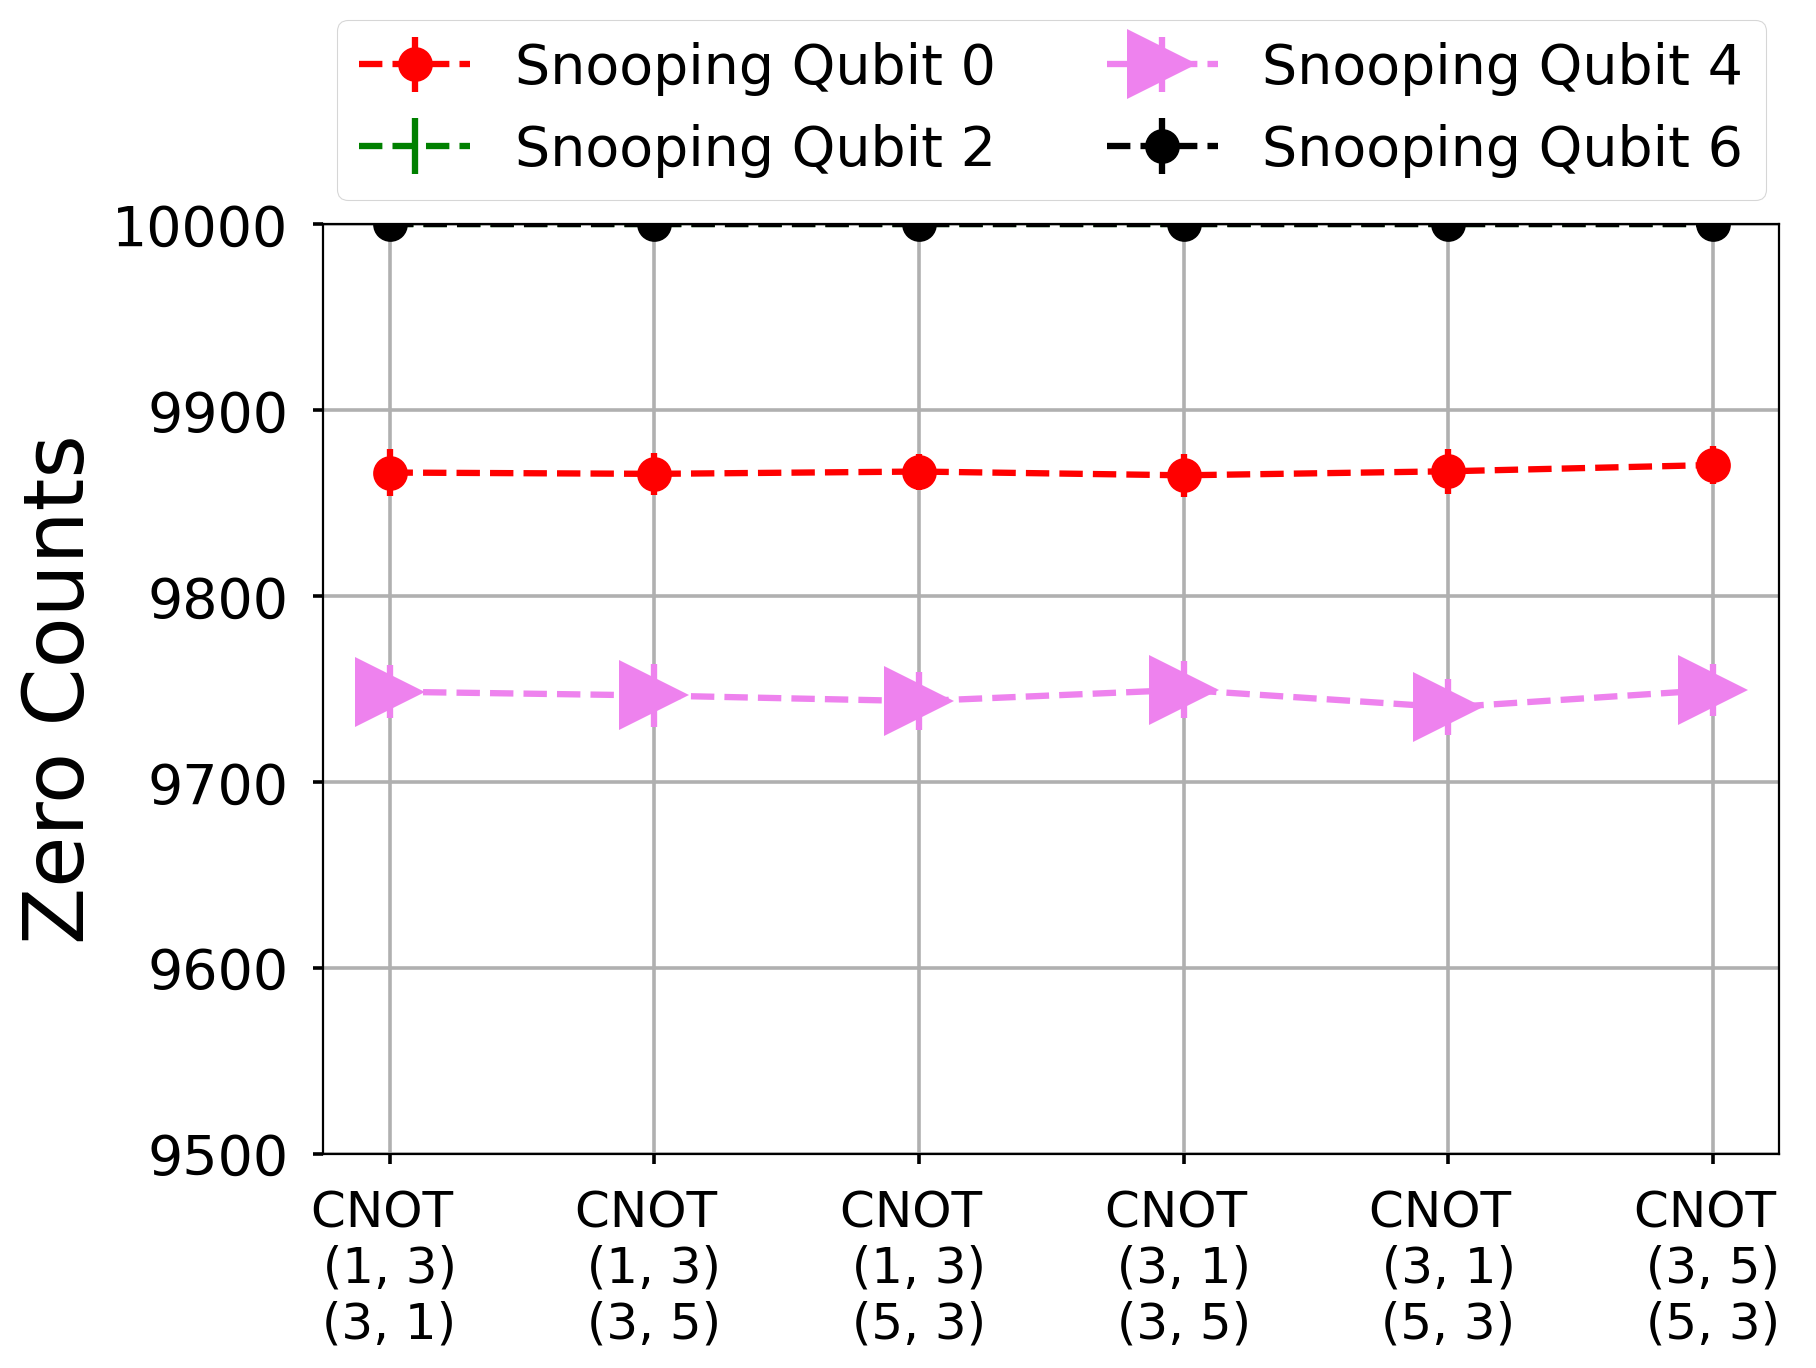

exp_name: CNOT on Victim qubits (4, 5, 6)
[4, 5, 6]
{0: [10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [9894.36, 9894.68, 9894.546666666667, 9896.146666666667]}
{0: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 3: [9885.16, 9887.5, 9884.9, 9883.4, 9885.92, 9883.74]}
0
1
2
3


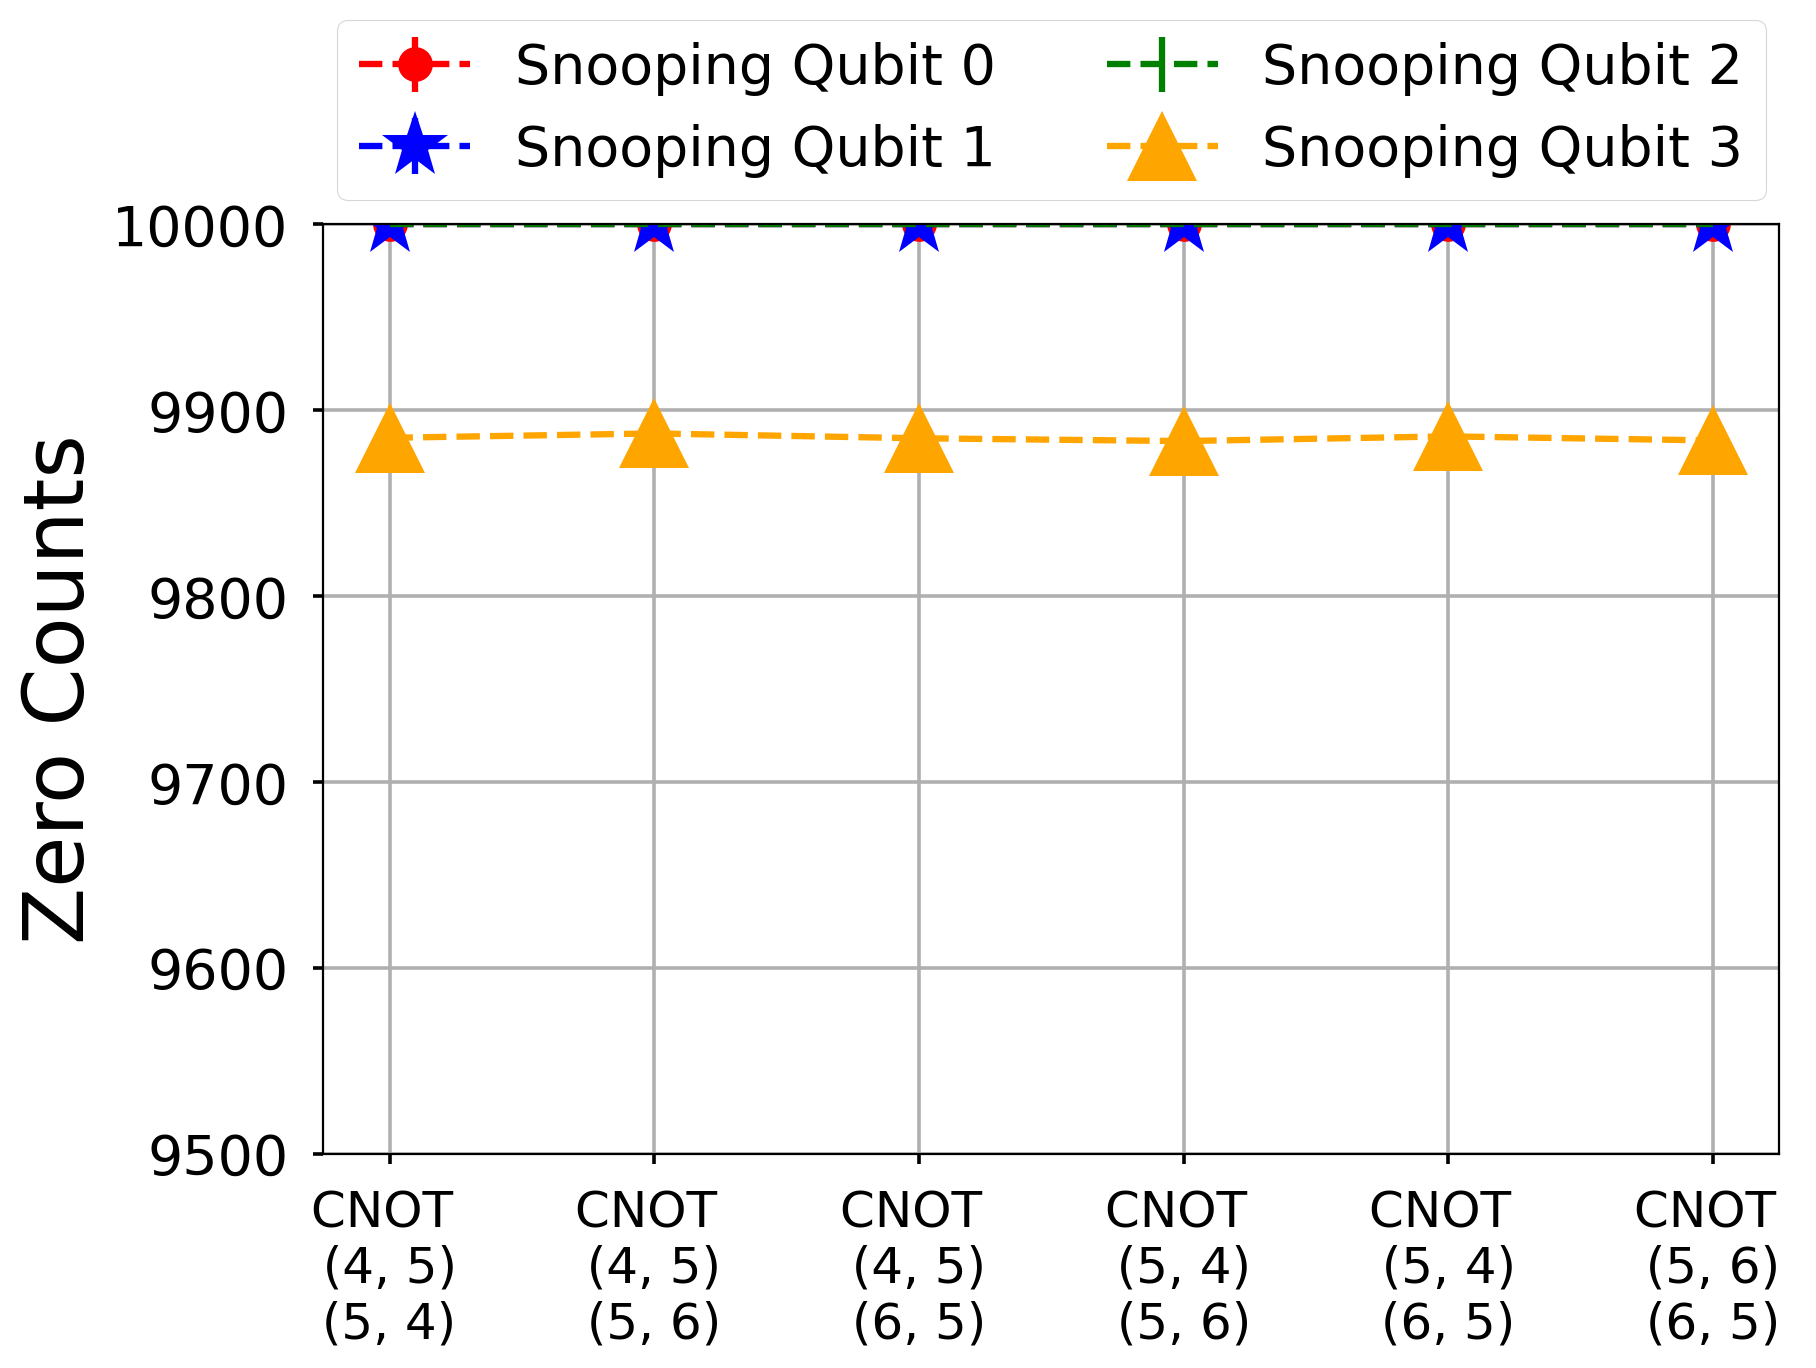

exp_name: CNOT on Victim qubits (0, 1, 2)
[0, 1, 2]
{3: [9872.693333333333, 9870.653333333334, 9875.613333333333, 9874.48], 4: [9770.973333333333, 9772.373333333333, 9768.626666666667, 9772.226666666667], 5: [9521.12, 9522.346666666666, 9526.893333333333, 9525.76], 6: [9889.04, 9890.96, 9890.013333333334, 9892.053333333333]}
{3: [9869.26, 9871.56, 9872.78, 9870.6, 9869.56, 9873.84], 4: [9813.26, 9816.0, 9816.46, 9816.52, 9811.74, 9813.84], 5: [9697.06, 9691.44, 9691.14, 9690.28, 9697.52, 9692.78], 6: [9875.8, 9872.8, 9872.54, 9875.32, 9874.6, 9873.88]}
3
4
5
6


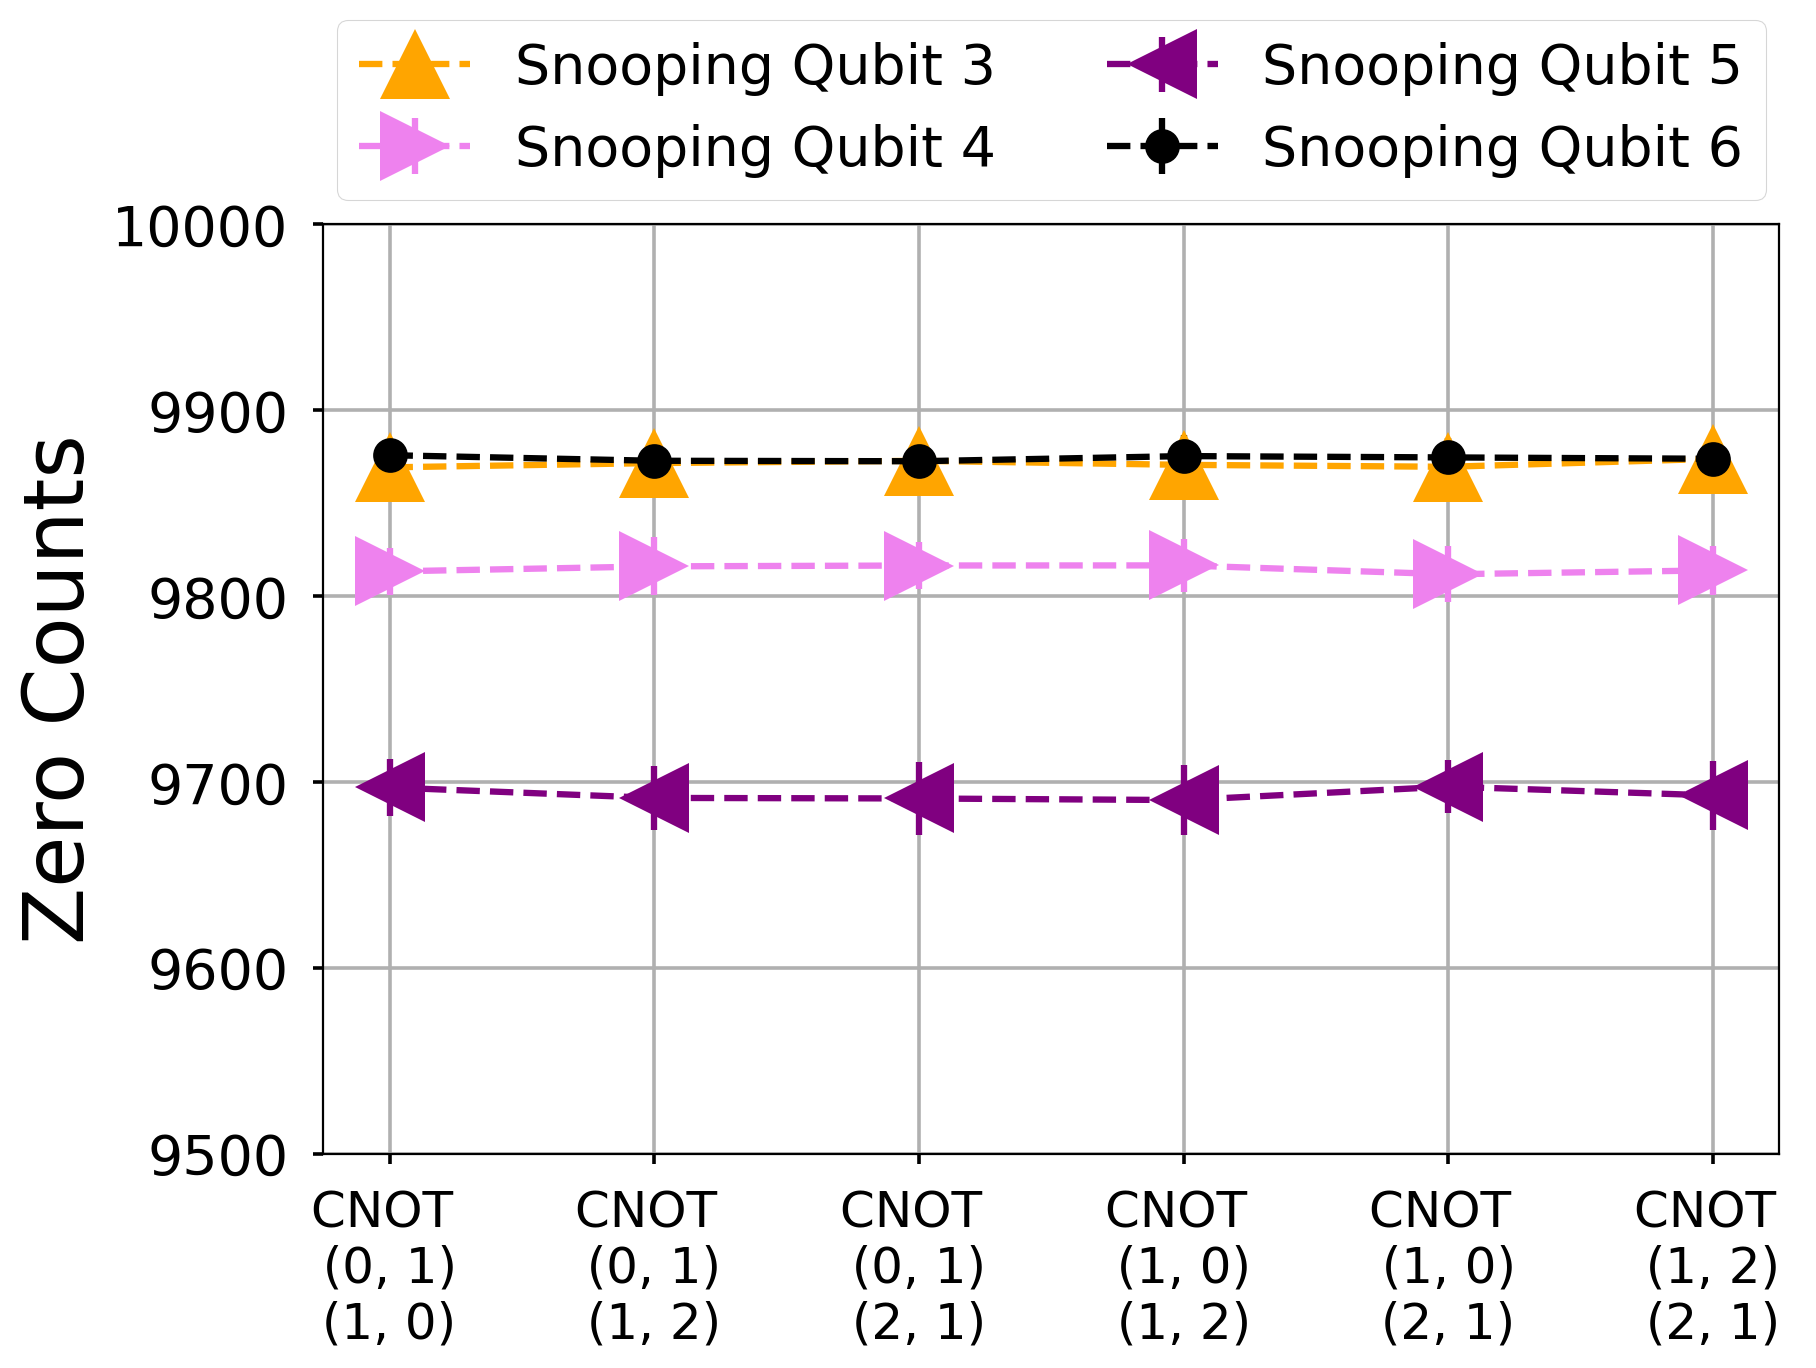

In [719]:
## Figure 4; Two qubit plots


colors = ['red', 'blue', 'green', 'orange', 'violet', 'purple', 'black']
markers = ['.', '*', '+', '^', '>', '<', '.']
for k in single_CNOT_counts.keys():
    print(f'exp_name: CNOT on Victim qubits {k}')
    
    snooping_qubits = []
    
    vic_qubs = list(k)
    print(vic_qubs)
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    
    cnot_pos = list(filter(lambda k: k[0] in vic_qubs and k[1] in vic_qubs, cm))

    data_single = single_CNOT_counts[k]
    data_double = double_CNOT_counts[k]
    print(data_single)
    print(data_double)
    
    for key in data_single.keys():
        print(key)
        plt.scatter(range(len(data_double[key])), data_double[key], c=colors[key],  marker=markers[key])
        plt.errorbar(range(len(data_double[key])), data_double[key], label=f"Snooping Qubit {key}",
                     yerr=double_CNOT_counts_error_bars[k][key],
                     c=colors[key], fmt ='--', capsize=5,  marker=markers[key], markersize=25)
    combs = list(combinations(cnot_pos, 2))
    # combs = [v[0] for v in combs]
    plt.xticks([0,1,2,3,4,5], [f'CNOT \n {v[0]} \n{v[1]}' for v in list(combs)], fontsize=18, rotation=0)
    plt.yticks(fontsize=20)
    # plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    # plt.title(f"victim qubits {k} with single CNOT between them")
    plt.grid()

    plt.legend(ncol=2, loc='upper center', fontsize=20, bbox_to_anchor=(0.5, 1.25))
    plt.tight_layout()
    # plt.xlabel('CNOT (control, target) qubit pairs used', fontsize=24)
    plt.ylabel('Zero Counts', fontsize=30)
    plt.ylim([9500, 10000])
    
    # plt.show()
    plt.subplots_adjust(left=0.2, right=0.9, top=0.8, bottom=0.15)
    plt.savefig(f"../figures/double_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.svg")
    plt.savefig(f"../figures/double_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.pdf")
    plt.show()
    plt.close()

exp_name: similar CNOT depth effect on Victim qubits (1, 3, 5)
[1, 3, 5]
{0: [9868.573333333334, 9864.506666666666, 9869.32, 9867.786666666667], 2: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9522.173333333334, 9523.493333333334, 9518.72, 9524.44], 6: [10000.0, 10000.0, 10000.0, 10000.0]}
{0: [9866.46, 9865.76, 9867.0, 9864.98, 9867.14, 9870.52], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 4: [9748.58, 9746.54, 9743.5, 9749.58, 9740.2, 9749.52], 6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]}
0
2
4
6
0
2
4
6


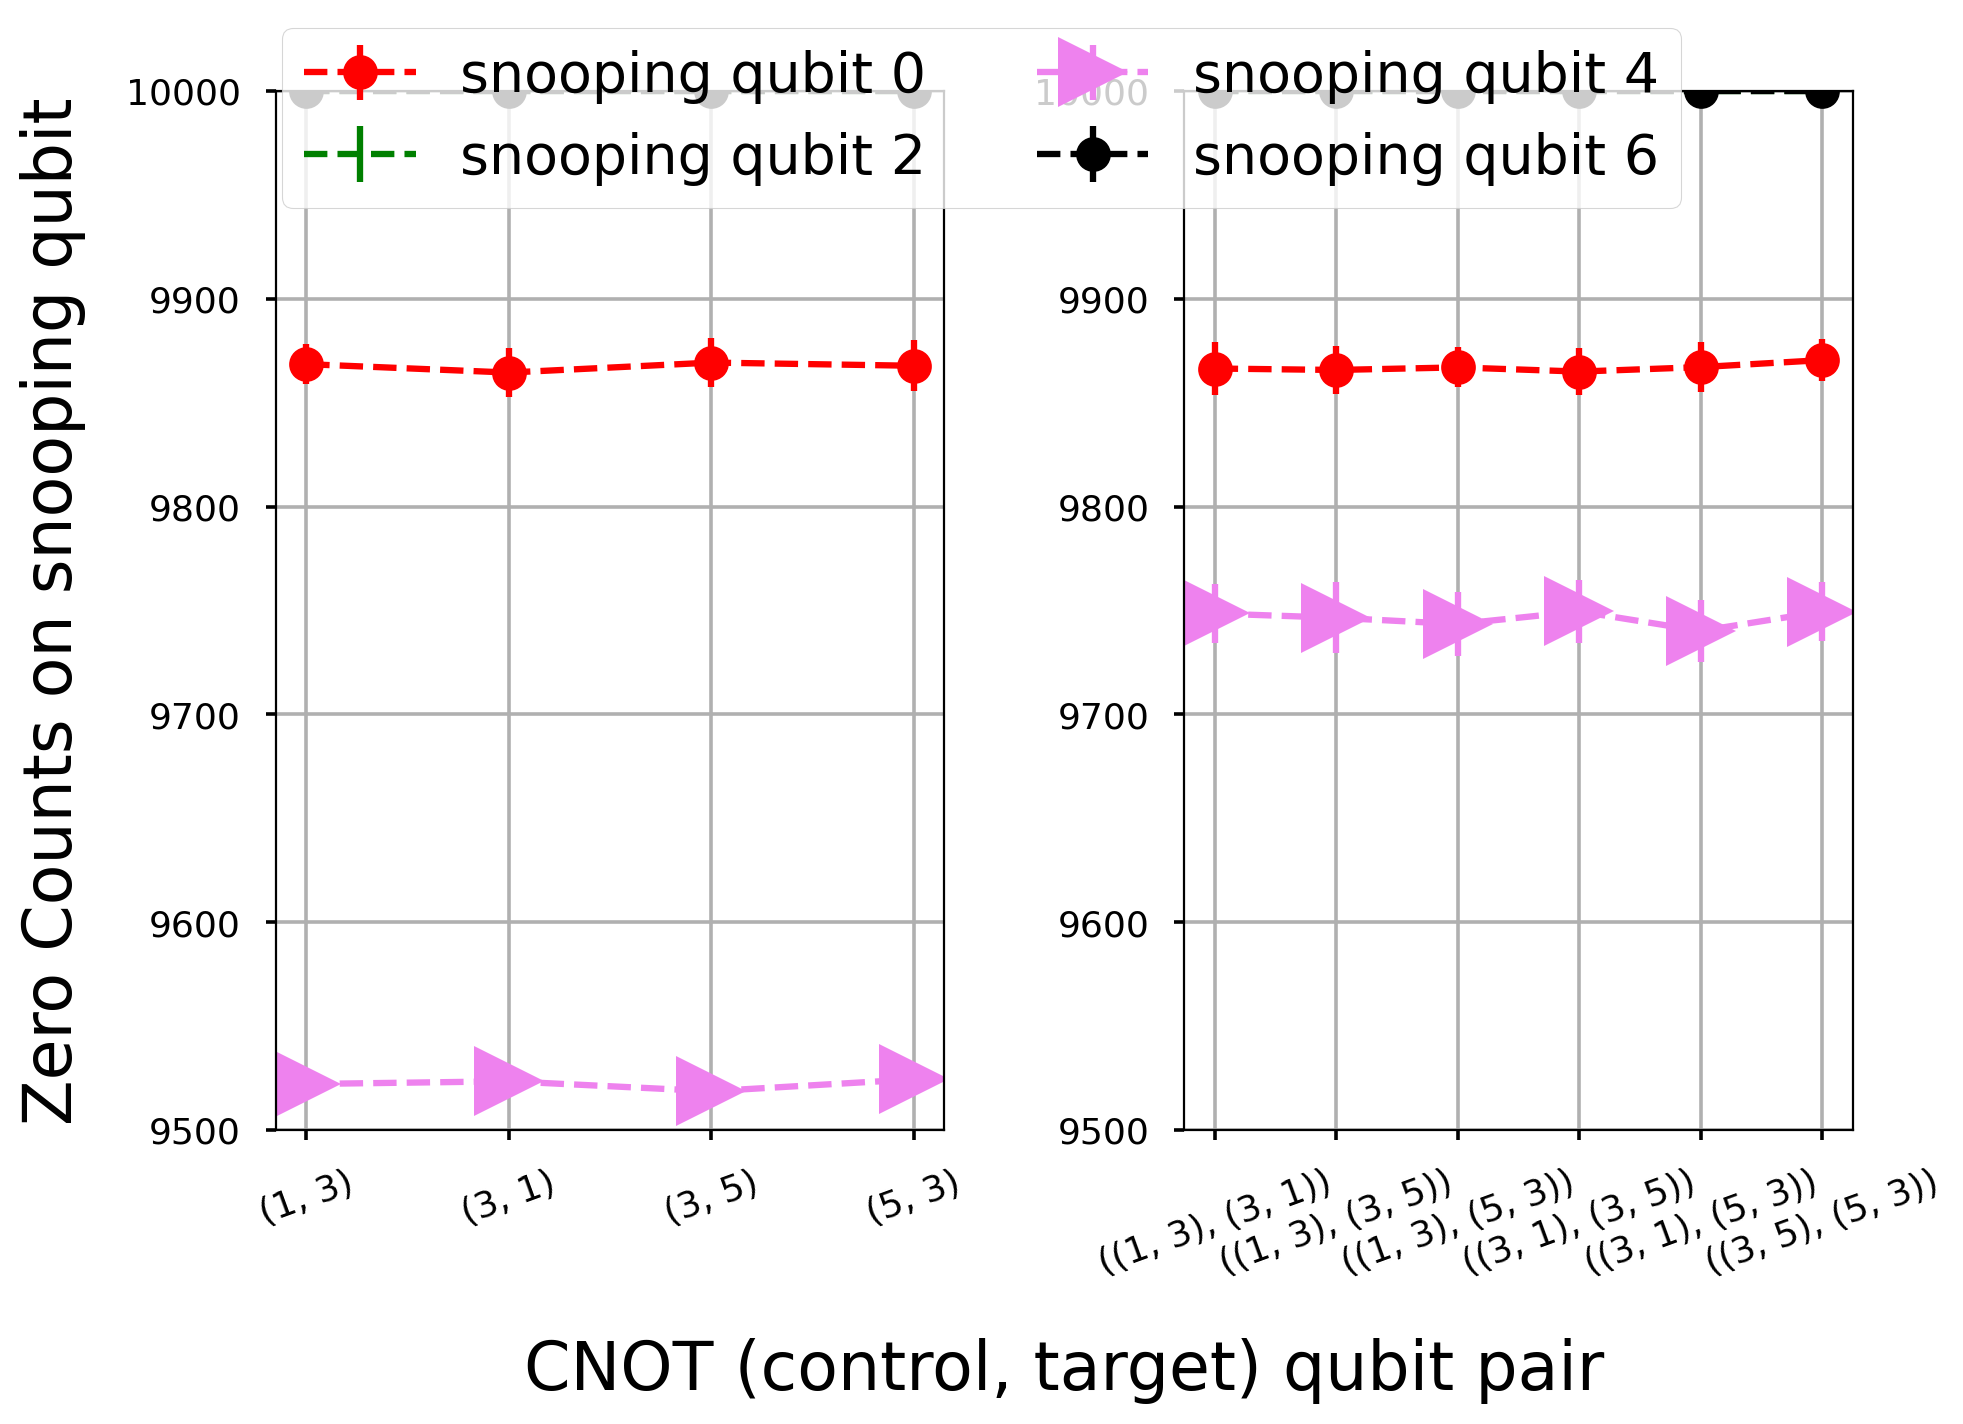

exp_name: similar CNOT depth effect on Victim qubits (4, 5, 6)
[4, 5, 6]
{0: [10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [9894.36, 9894.68, 9894.546666666667, 9896.146666666667]}
{0: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 3: [9885.16, 9887.5, 9884.9, 9883.4, 9885.92, 9883.74]}
0
1
2
3
0
1
2
3


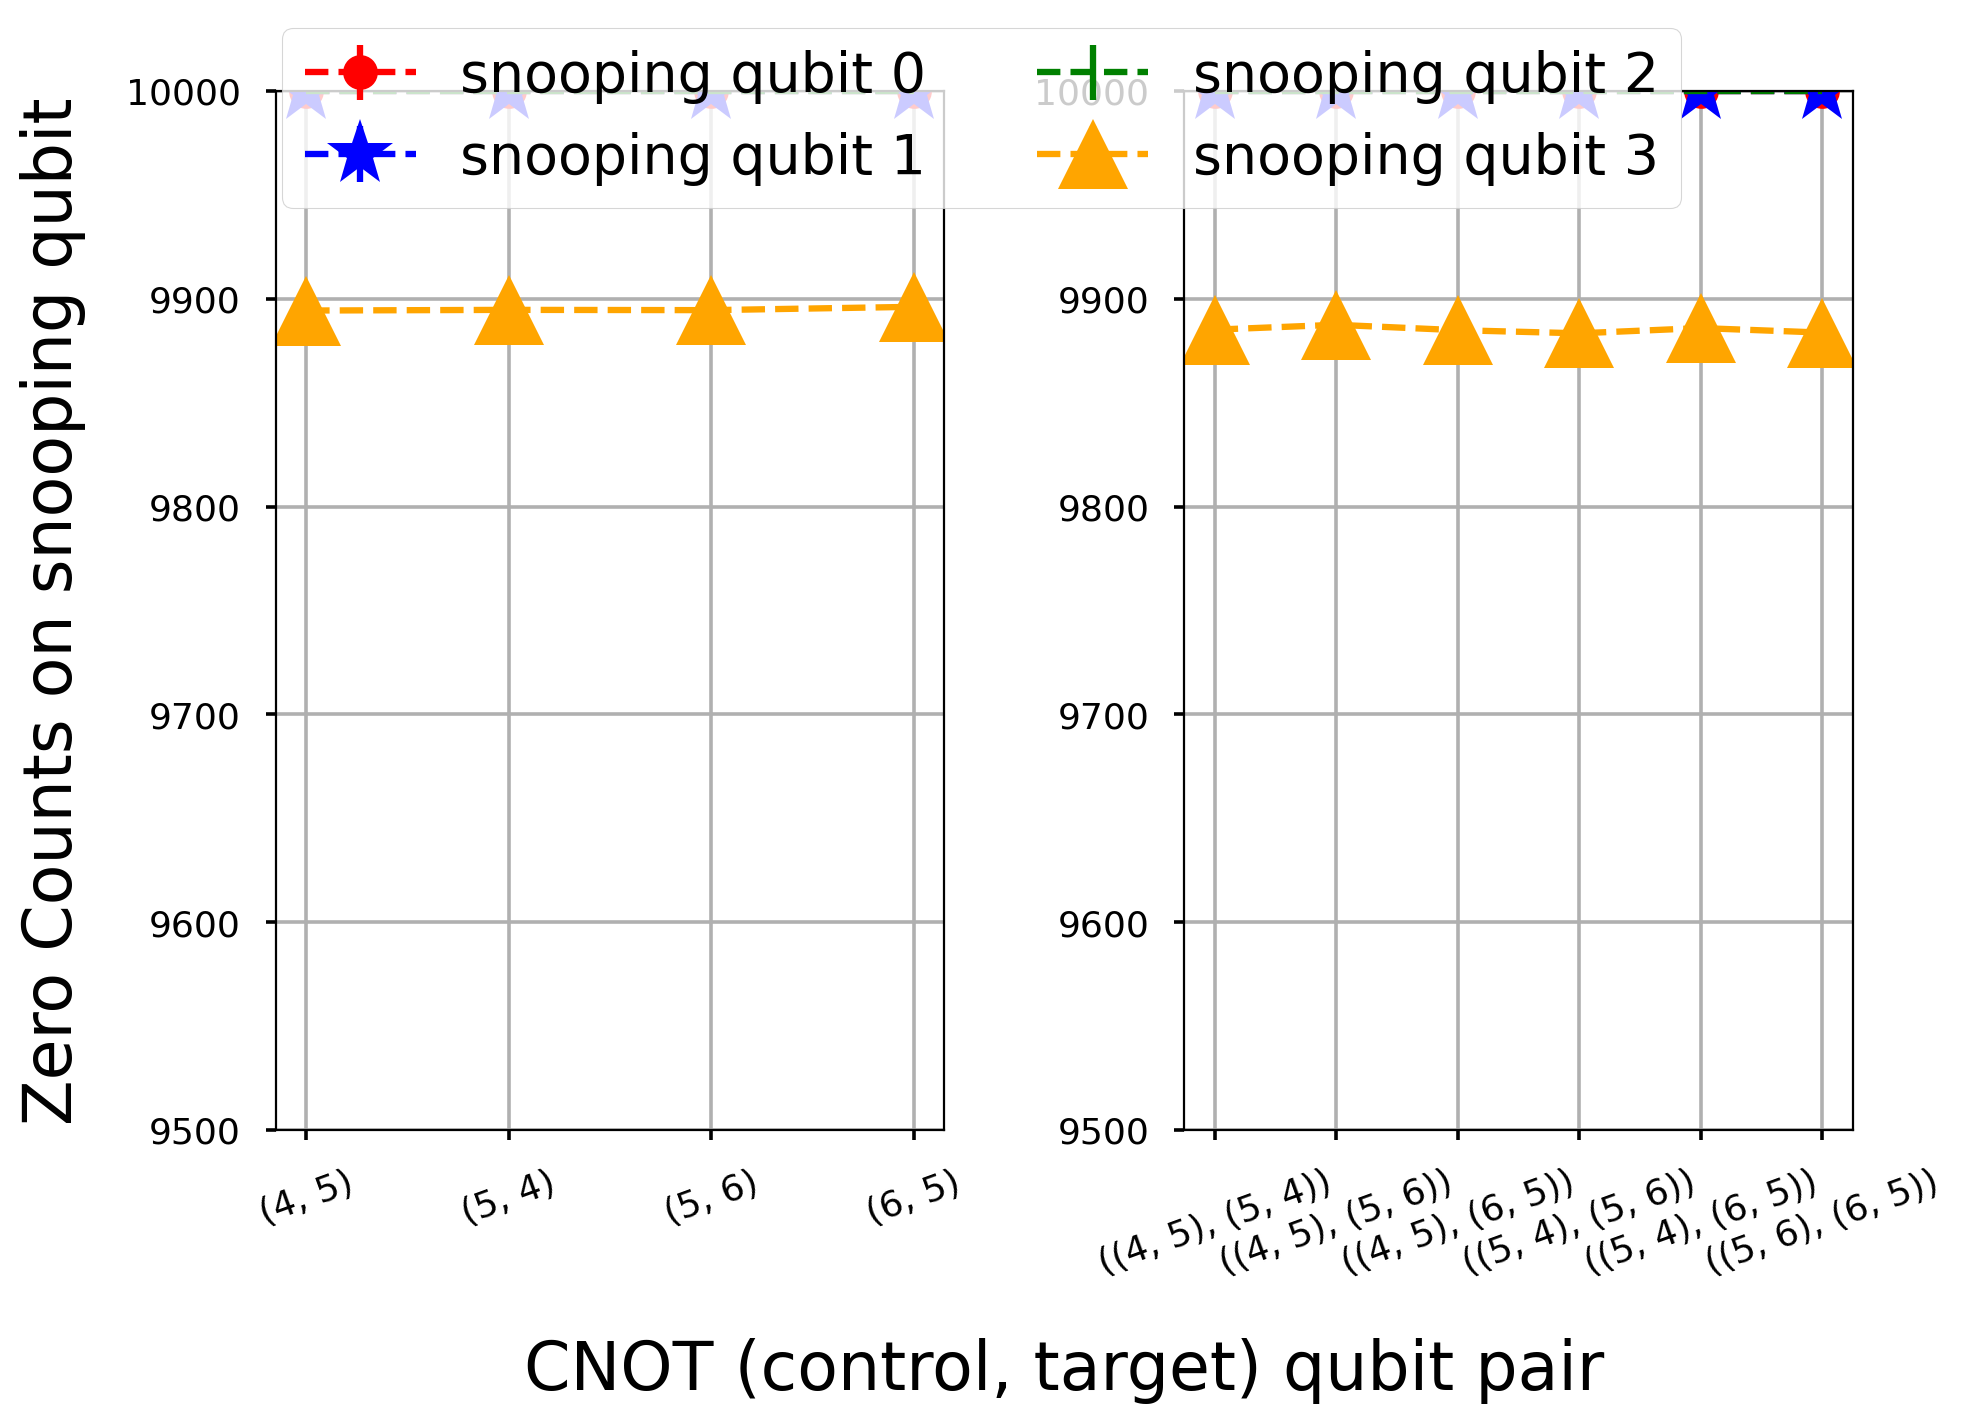

exp_name: similar CNOT depth effect on Victim qubits (0, 1, 2)
[0, 1, 2]
{3: [9872.693333333333, 9870.653333333334, 9875.613333333333, 9874.48], 4: [9770.973333333333, 9772.373333333333, 9768.626666666667, 9772.226666666667], 5: [9521.12, 9522.346666666666, 9526.893333333333, 9525.76], 6: [9889.04, 9890.96, 9890.013333333334, 9892.053333333333]}
{3: [9869.26, 9871.56, 9872.78, 9870.6, 9869.56, 9873.84], 4: [9813.26, 9816.0, 9816.46, 9816.52, 9811.74, 9813.84], 5: [9697.06, 9691.44, 9691.14, 9690.28, 9697.52, 9692.78], 6: [9875.8, 9872.8, 9872.54, 9875.32, 9874.6, 9873.88]}
3
4
5
6
3
4
5
6


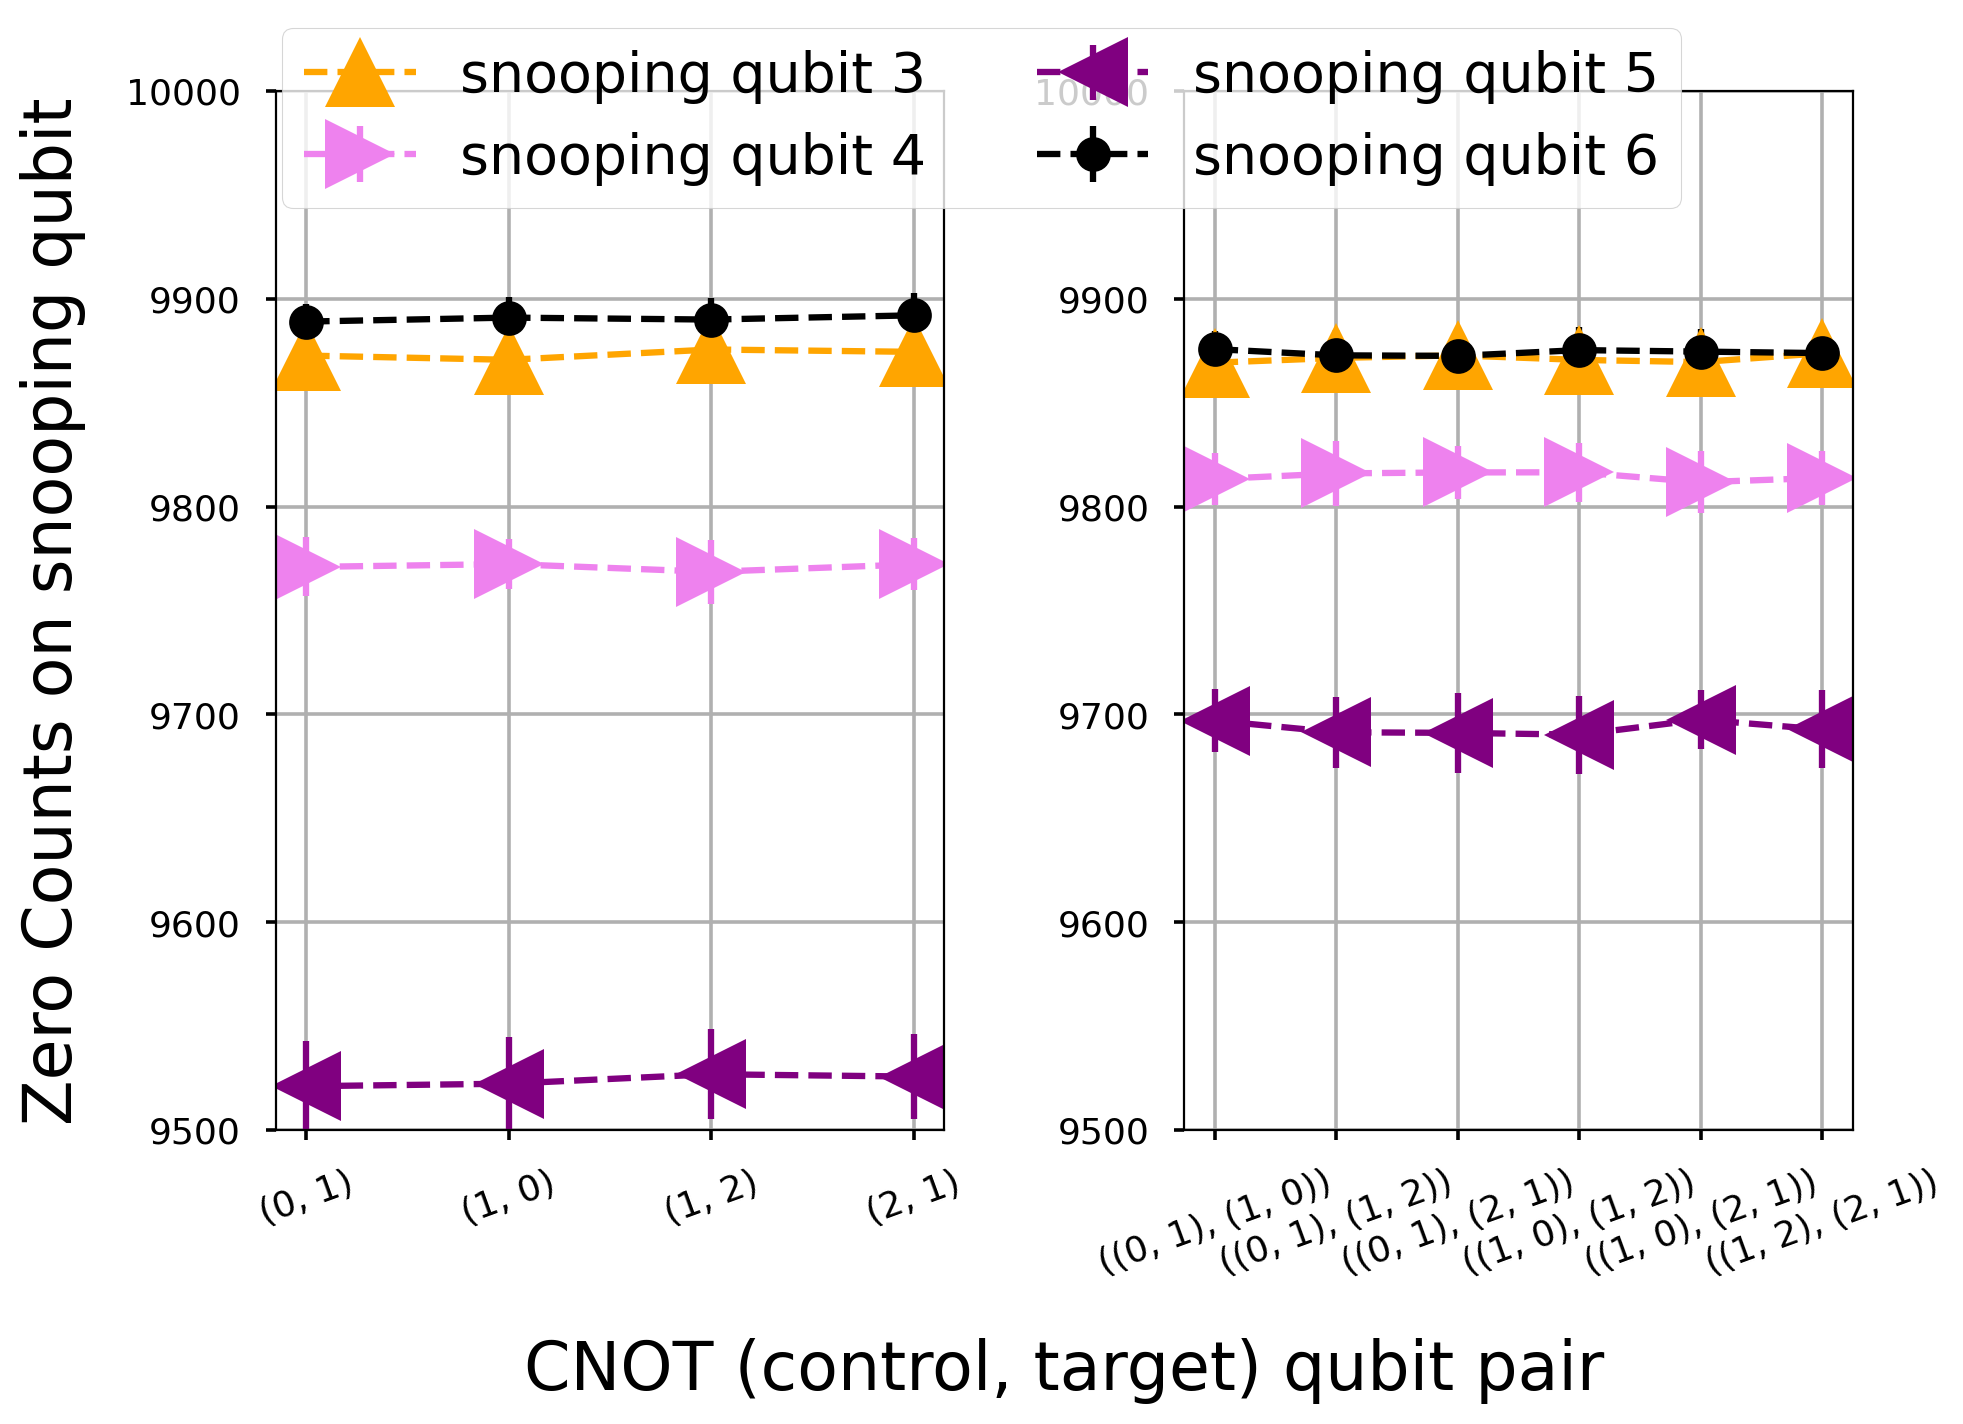

In [670]:
## Figure 4; Explaining the effect of the CNOT circuit depth


colors = ['red', 'blue', 'green', 'orange', 'violet', 'purple', 'black']
markers = ['.', '*', '+', '^', '>', '<', '.']
for k in single_CNOT_counts.keys():
    print(f'exp_name: similar CNOT depth effect on Victim qubits {k}')
    
    snooping_qubits = []
    
    vic_qubs = list(k)
    print(vic_qubs)
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    
    cnot_pos = list(filter(lambda k: k[0] in vic_qubs and k[1] in vic_qubs, cm))

    data_single = single_CNOT_counts[k]
    data_double = double_CNOT_counts[k]
    print(data_single)
    print(data_double)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)    # The big subplot
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    # ax2.get_yaxis().set_visible(False)
    for key in data_single.keys():
        print(key)
        ax1.scatter(range(len(data_single[key])), data_single[key], c=colors[key],  marker=markers[key])
        ax1.errorbar(range(len(data_single[key])), data_single[key], label=f"Snooping Qubit {key}",
                     yerr=single_CNOT_counts_error_bars[k][key],
                     c=colors[key], fmt ='--', capsize=5,  marker=markers[key], markersize=25)
        
    for key in data_single.keys():
        print(key)
        ax2.scatter(range(len(data_double[key])), data_double[key], c=colors[key],  marker=markers[key])
        ax2.errorbar(range(len(data_double[key])), data_double[key], 
                     yerr=double_CNOT_counts_error_bars[k][key],
                     c=colors[key], fmt ='--', capsize=15,  marker=markers[key], markersize=25)
        
    combs = list(combinations(cnot_pos, 1))
    combs = [v[0] for v in combs]
    ax1.set_xticks([0,1,2,3], list(combs), rotation=20)
    ax1.grid()
    # ax1.legend(ncol=2, loc='center', fontsize=20, bbox_to_anchor=(1.92,1.1))

    ax1.set_ylim([9500, 10000])
    
    double_combs = list(combinations(cnot_pos, 2))
    ax2.set_xticks([0,1,2,3,4,5], list(double_combs), rotation=20)
    ax2.xaxis.grid(True)
    ax2.yaxis.grid(True)
    # ax2.legend()
    ax2.set_ylim([9500, 10000])
    # lines = [] 
    # labels = [] 
    
    # for ax in fig.axes: 
    #     Line, Label = ax.get_legend_handles_labels() 
    #     # print(Label) 
    #     # lines.extend(Line) 
    #     labels.extend(Label) 
  
    fig.legend(ncols=2, loc='upper center', fontsize=20) 
  
    fig.tight_layout()
    
    ax.set_xlabel('CNOT (control, target) qubit pair', labelpad=50, fontsize=24)
    ax.set_ylabel('Zero Counts on Snooping Qubit', labelpad=35, fontsize=24)
    # ax.set_title(f"compare CNOT depth effect", pad=10)

    plt.savefig(f"../figures/depth_effect_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.svg")
    plt.savefig(f"../figures/depth_effect_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.pdf")
    plt.show()
    plt.close()

exp_name: similar CNOT depth effect on Victim qubits (1, 3, 5)
[1, 3, 5]
{0: [9868.573333333334, 9864.506666666666, 9869.32, 9867.786666666667], 2: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9522.173333333334, 9523.493333333334, 9518.72, 9524.44], 6: [10000.0, 10000.0, 10000.0, 10000.0]}
{0: [9866.46, 9865.76, 9867.0, 9864.98, 9867.14, 9870.52], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 4: [9748.58, 9746.54, 9743.5, 9749.58, 9740.2, 9749.52], 6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]}
0
2
4
6


/var/folders/yq/3cv6zh6d1bn3rphptqpcqdkm0000gn/T/ipykernel_48015/3504647905.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(range(len(data_single[key])), data_single[key],  label=f"snooping qubit {key}",


0
2
4
6


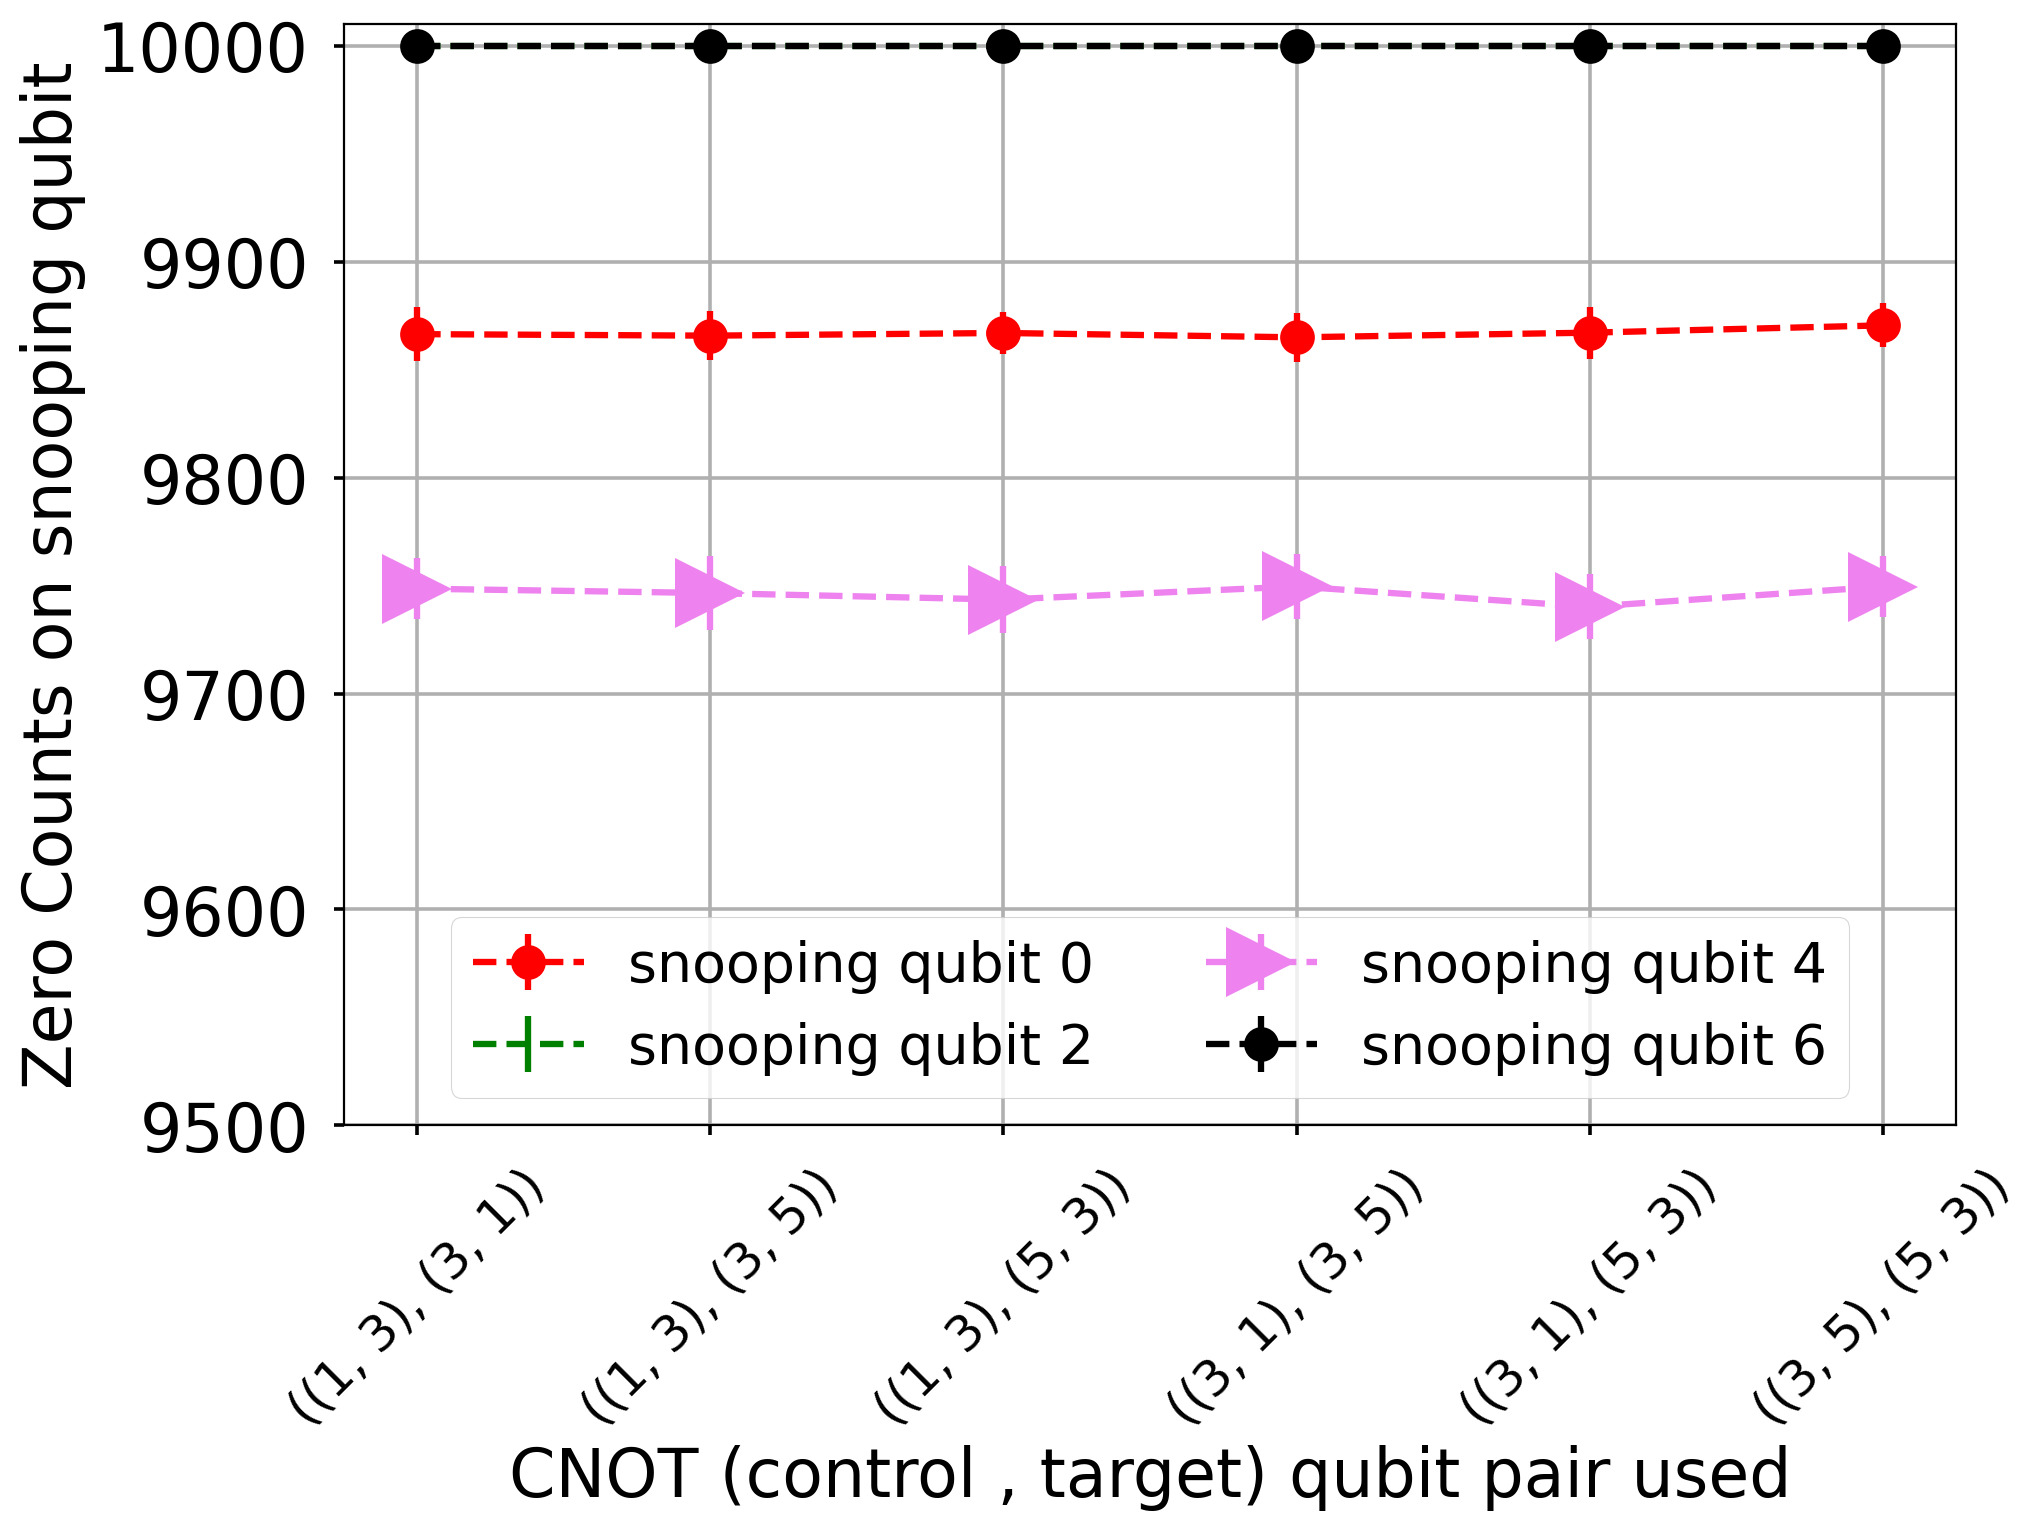

exp_name: similar CNOT depth effect on Victim qubits (4, 5, 6)
[4, 5, 6]
{0: [10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [9894.36, 9894.68, 9894.546666666667, 9896.146666666667]}
{0: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 3: [9885.16, 9887.5, 9884.9, 9883.4, 9885.92, 9883.74]}
0
1
2
3
0
1
2
3


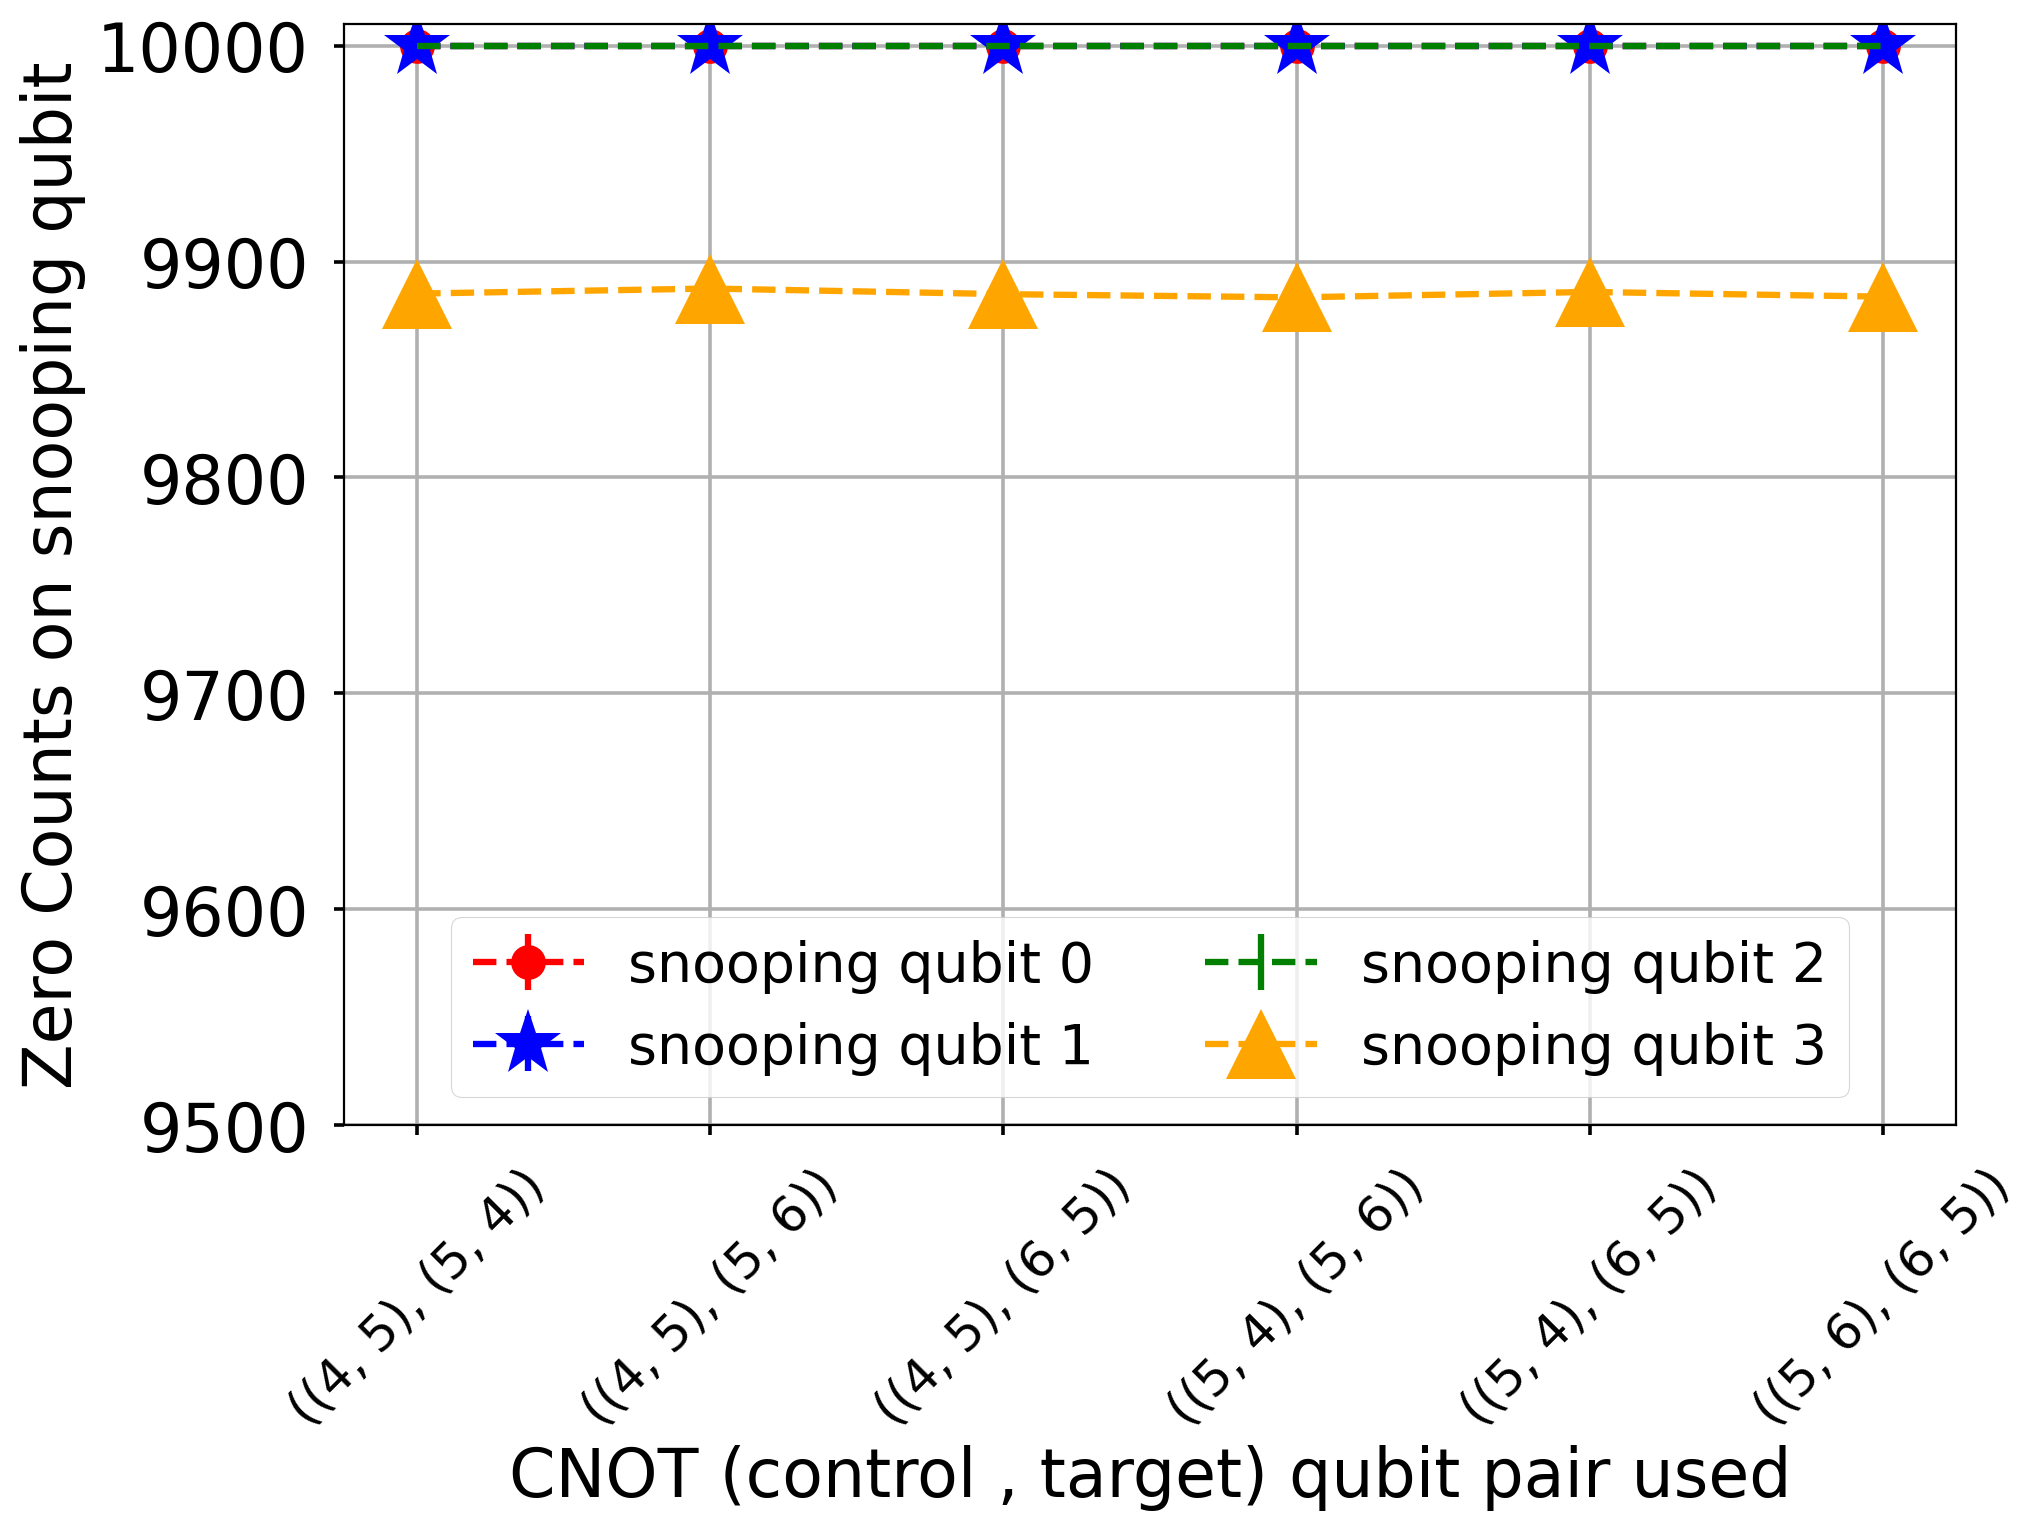

exp_name: similar CNOT depth effect on Victim qubits (0, 1, 2)
[0, 1, 2]
{3: [9872.693333333333, 9870.653333333334, 9875.613333333333, 9874.48], 4: [9770.973333333333, 9772.373333333333, 9768.626666666667, 9772.226666666667], 5: [9521.12, 9522.346666666666, 9526.893333333333, 9525.76], 6: [9889.04, 9890.96, 9890.013333333334, 9892.053333333333]}
{3: [9869.26, 9871.56, 9872.78, 9870.6, 9869.56, 9873.84], 4: [9813.26, 9816.0, 9816.46, 9816.52, 9811.74, 9813.84], 5: [9697.06, 9691.44, 9691.14, 9690.28, 9697.52, 9692.78], 6: [9875.8, 9872.8, 9872.54, 9875.32, 9874.6, 9873.88]}
3
4
5
6
3
4
5
6


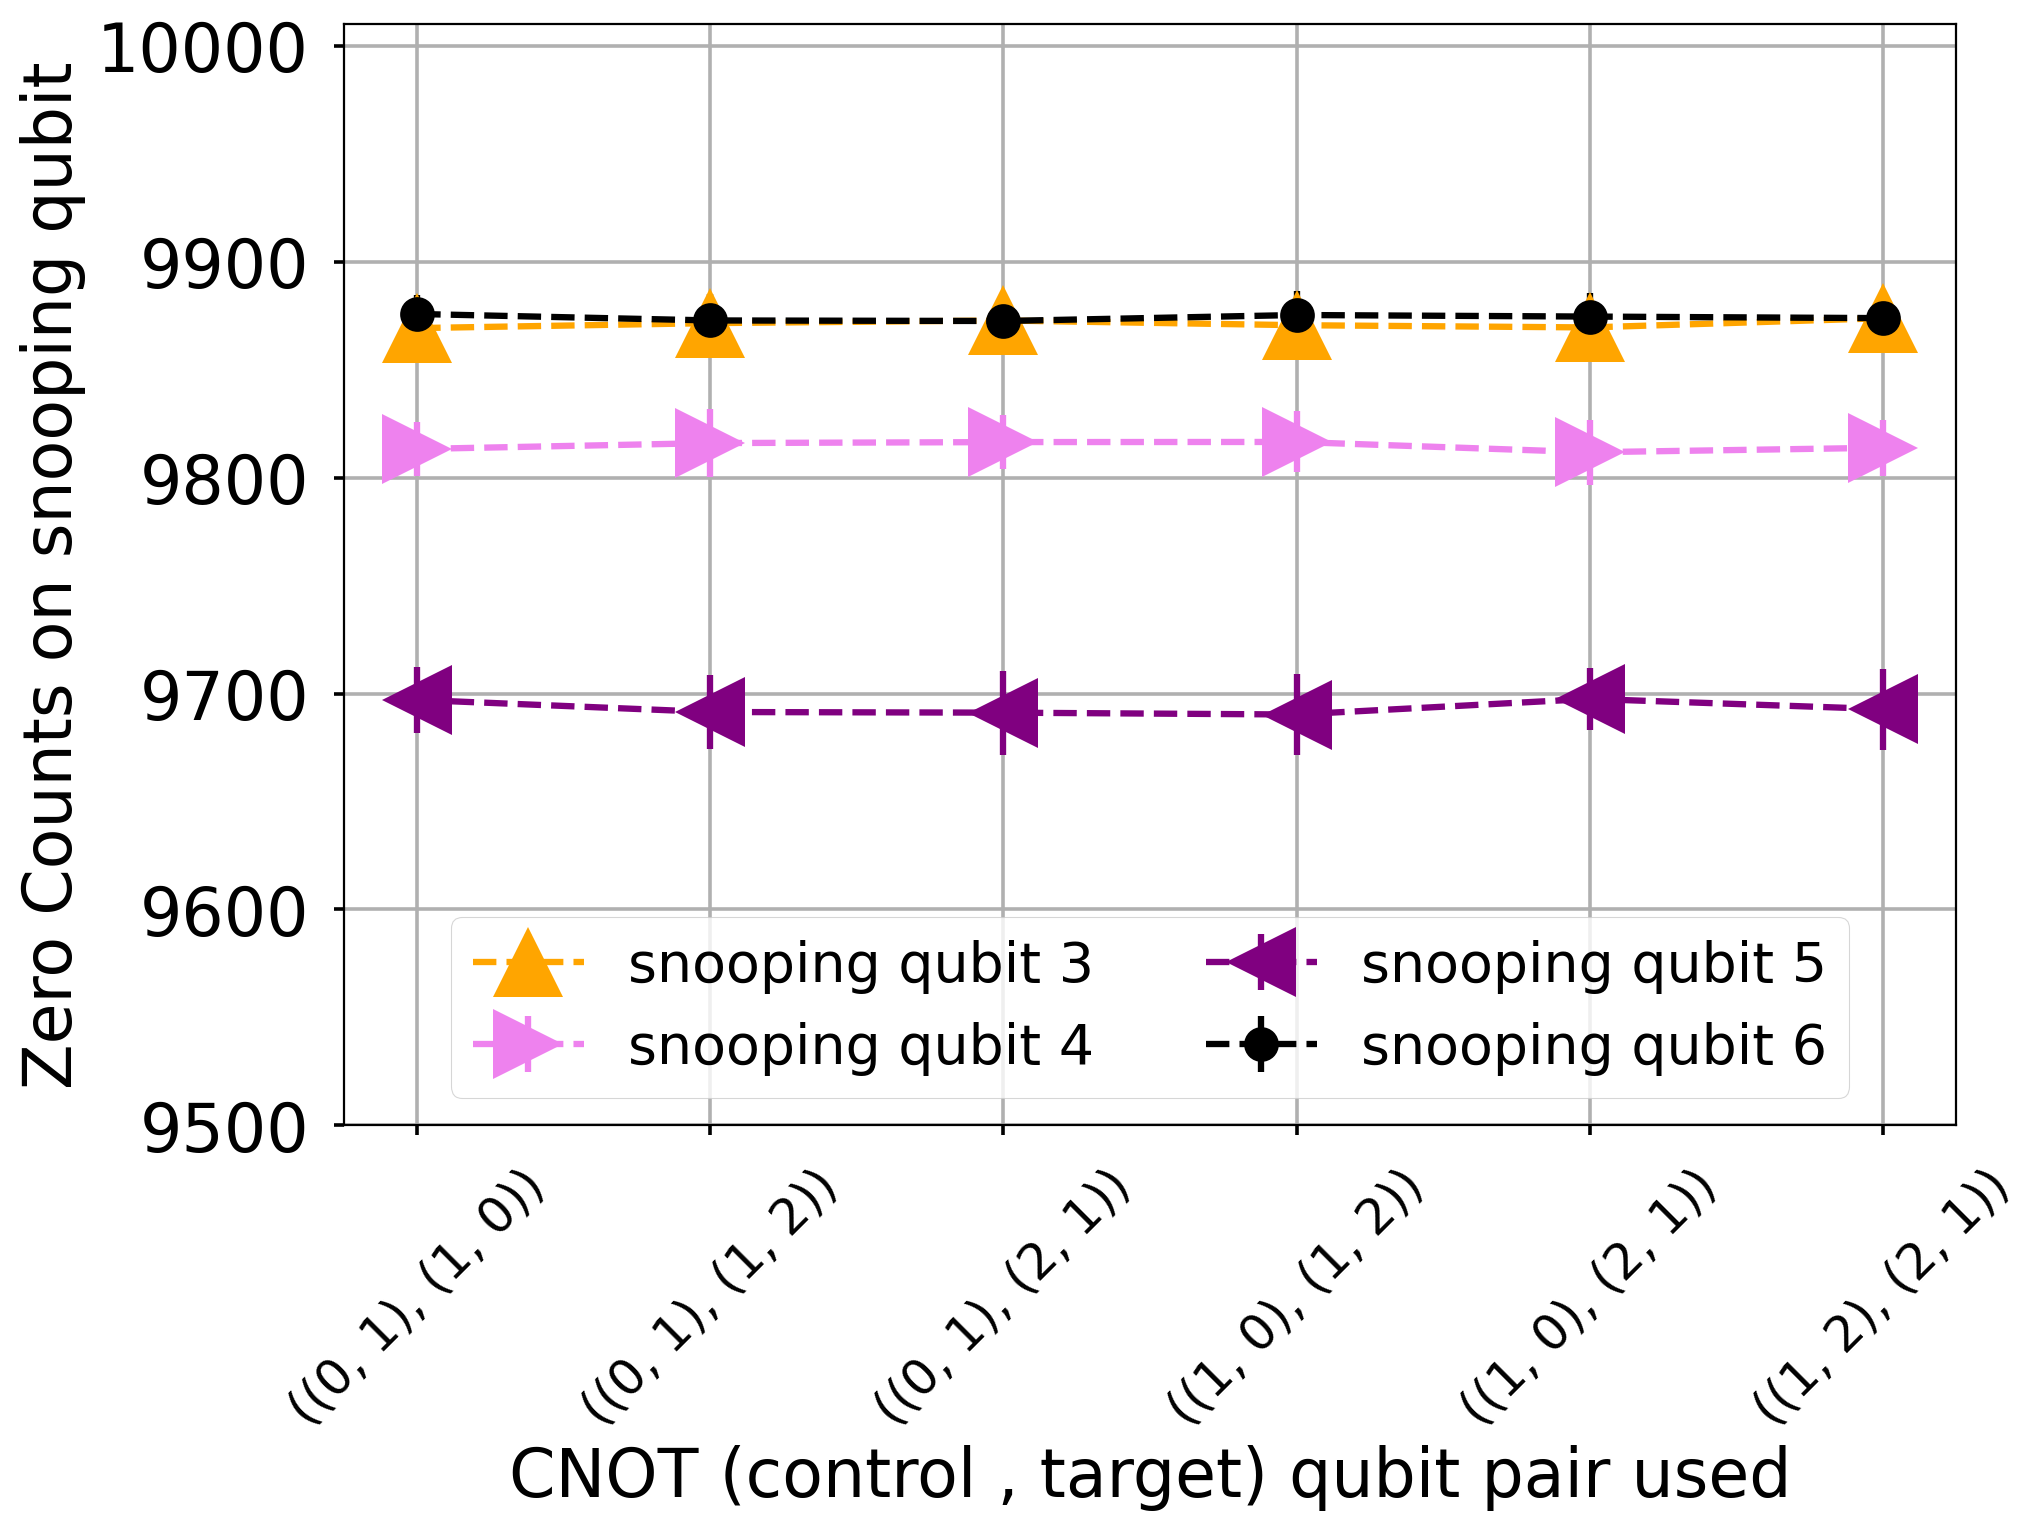

In [671]:
## Figure 4; Explaining the effect of the CNOT circuit depth - Version 2


colors = ['red', 'blue', 'green', 'orange', 'violet', 'purple', 'black']
markers = ['.', '*', '+', '^', '>', '<', '.']
for k in single_CNOT_counts.keys():
    print(f'exp_name: similar CNOT depth effect on Victim qubits {k}')
    
    snooping_qubits = []
    
    vic_qubs = list(k)
    print(vic_qubs)
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    
    cnot_pos = list(filter(lambda k: k[0] in vic_qubs and k[1] in vic_qubs, cm))

    data_single = single_CNOT_counts[k]
    data_double = double_CNOT_counts[k]
    print(data_single)
    print(data_double)
    

    # ax2.get_yaxis().set_visible(False)
    for key in data_single.keys():
        print(key)
        plt.scatter(range(len(data_single[key])), data_single[key], c=colors[key], marker=markers[key])
        plt.errorbar(range(len(data_single[key])), data_single[key],  label=f"Snooping Qubit {key}",
                     yerr=single_CNOT_counts_error_bars[k][key],
                     c=colors[key], fmt ='-o', capsize=5,  marker=markers[key], markersize=25)
    combs = list(combinations(cnot_pos, 1))
    combs = [v[0] for v in combs]
    plt.xticks([0,1,2,3], list(combs), rotation=20)
    plt.ylim([9500, 10010])
    plt.grid()
    plt.legend()
    plt.xlabel('(control qubit, target qubit) pair used for CNOT')
    plt.ylabel('Zero Counts from measurement on Snooping Qubit')
    plt.savefig(f"../figures/depth_effect_single_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.svg")
    plt.savefig(f"../figures/depth_effect_single_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.pdf")
    # plt.show()
    plt.close()
        
    for key in data_single.keys():
        print(key)
        plt.scatter(range(len(data_double[key])), data_double[key], c=colors[key],  marker=markers[key])
        plt.errorbar(range(len(data_double[key])), data_double[key], label=f"Snooping Qubit {key}",
                     yerr=double_CNOT_counts_error_bars[k][key],
                     c=colors[key], fmt ='--', capsize=5,  marker=markers[key], markersize=25)
        
    

    plt.ylim([9500, 10010])
    
    double_combs = list(combinations(cnot_pos, 2))
    plt.xticks([0,1,2,3,4,5], list(double_combs), fontsize=18, rotation=45)
    plt.grid()
    plt.legend(ncol=2, loc='lower center', fontsize=20)
    plt.xlabel('CNOT (control , target) qubit pair used', fontsize=24)
    plt.ylabel('Zero Counts on Snooping Qubit', fontsize=24)
    plt.yticks(fontsize=24)
    plt.savefig(f"../figures/depth_effect_double_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.svg")
    plt.savefig(f"../figures/depth_effect_double_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.pdf")
    plt.show()
    plt.close()

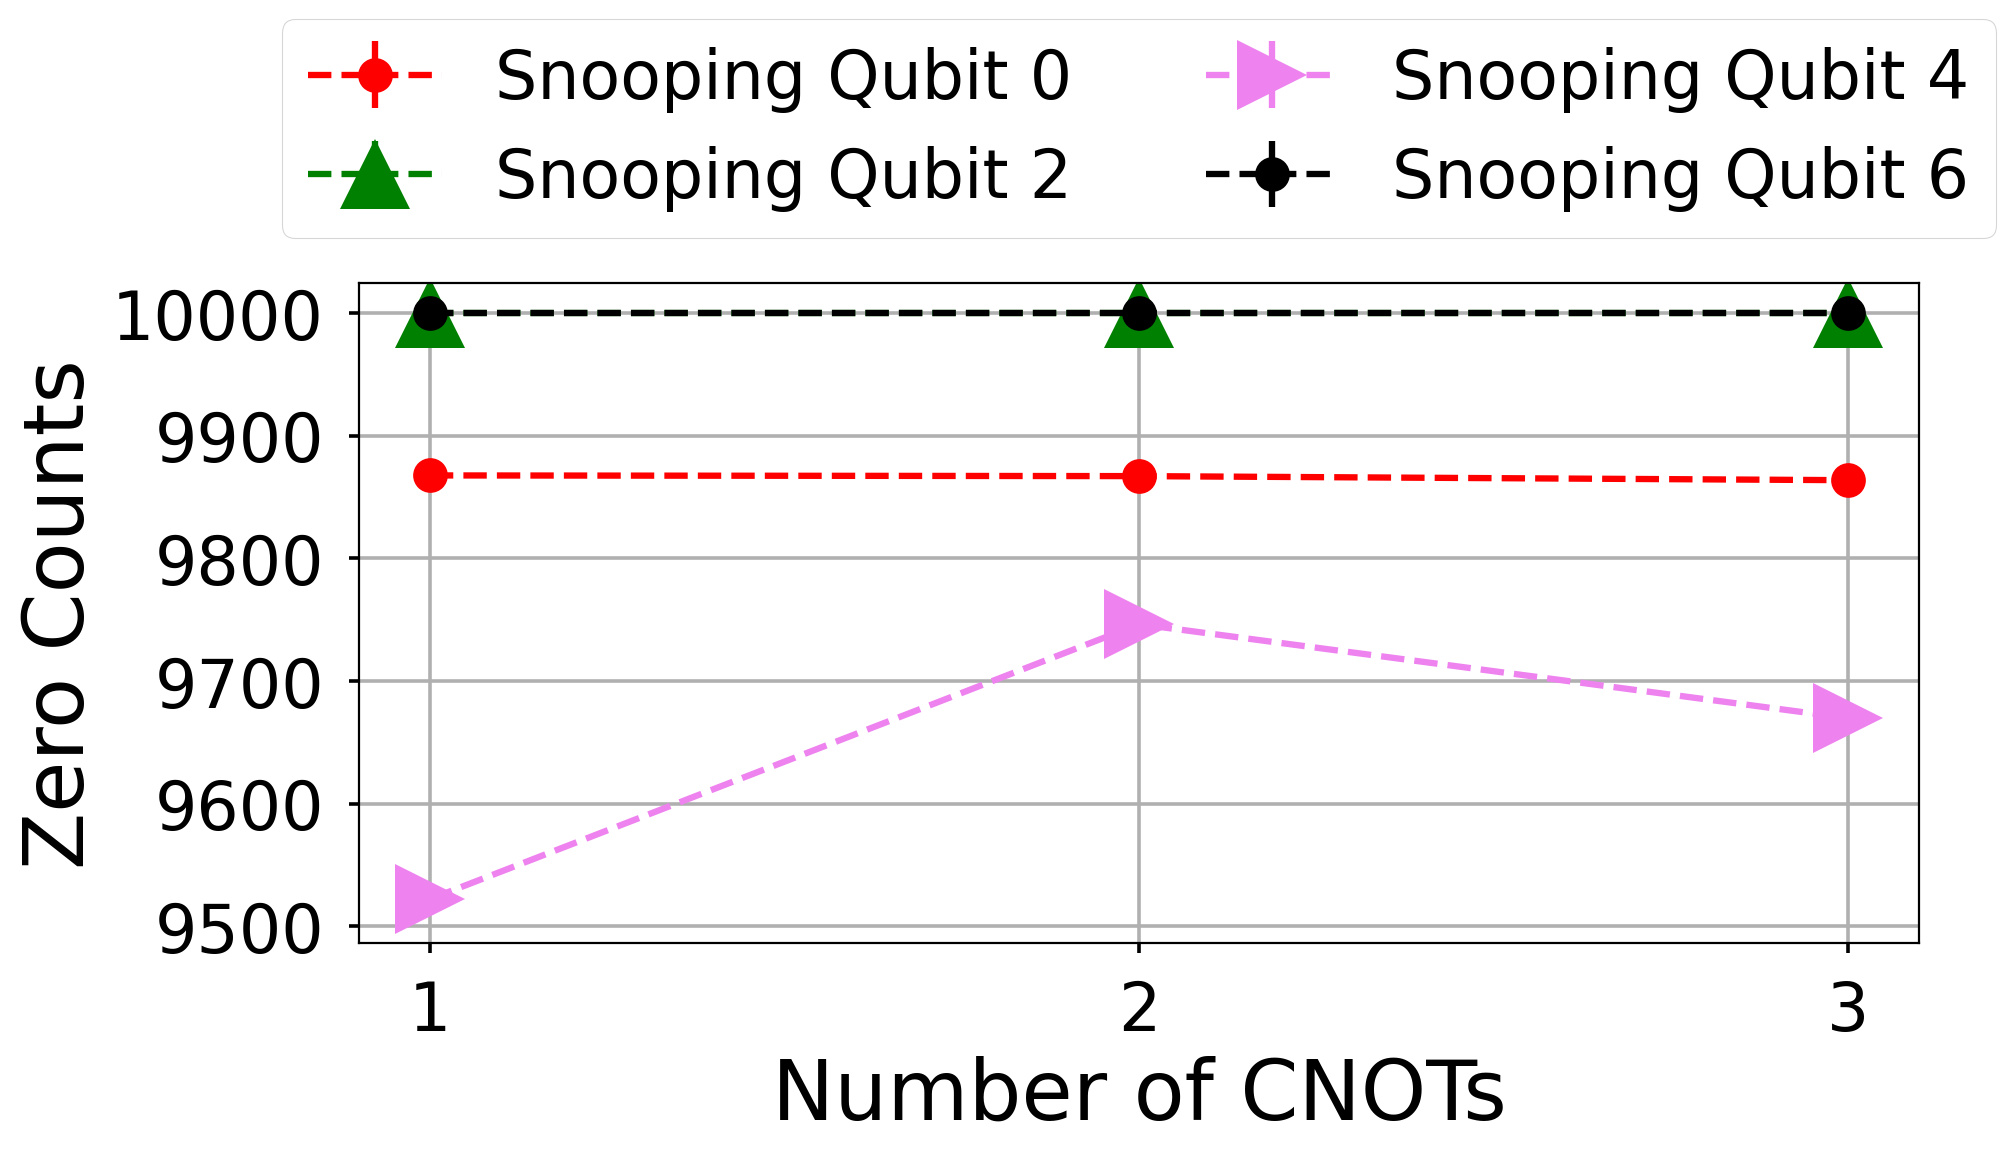

In [714]:
## Figure 7; Distinguishability of number of CNOTs

colors = ['red', 'blue', 'green', 'orange', 'violet', 'purple', 'black']
markers = ['.', '^', '^', '^', '>', '<', '.']

vic_qubs = [1,3,5]
snooping_qubits = [0,2,4,6]

data_single = single_CNOT_counts[(1,3,5)]
data_double = double_CNOT_counts[(1,3,5)]
data_SWAP = swap_counts[(5,3,1)]

reference_data = defaultdict(dict)
reference_data_error_bars = defaultdict(dict)


for key in data_single.keys():
    reference_data[key] = []
    reference_data[key].append(np.average(data_single[key]))
    reference_data[key].append(np.average(data_double[key]))
    reference_data[key].append(np.average(data_SWAP[key]))
    
    reference_data_error_bars[key] = []
    reference_data_error_bars[key].append(np.average(single_CNOT_counts_error_bars[(1,3,5)][key]))
    reference_data_error_bars[key].append(np.average(double_CNOT_counts_error_bars[(1,3,5)][key]))
    reference_data_error_bars[key].append(np.average(swap_counts_error_bars[(5,3,1)][key]))

plt.figure().set_figheight(6)
# plt.figure().set_figwidth(12)
for key in data_single.keys():  
    plt.scatter(range(len(reference_data[key])), reference_data[key], c=colors[key], marker=markers[key])
    plt.errorbar(range(len(reference_data[key])), reference_data[key], 
                    yerr=np.average(reference_data_error_bars[key]), label=f"Snooping Qubit {key}",
                    c=colors[key], fmt ='--', capsize=5,  marker=markers[key], markersize=25)
# plt.title(f"Distinguishability of number of CNOTs", pad=10)
plt.grid()

plt.legend(ncol=2, loc='upper center', fontsize=24, bbox_to_anchor=(0.5,1.45))
plt.tight_layout()
plt.xlabel('Number of CNOTs',fontsize=30)
plt.ylabel('Zero Counts', fontsize=30)
plt.xticks([0,1,2], [1,2,3], fontsize=24)
plt.yticks(fontsize=24)
# reference_data_error_bars
plt.subplots_adjust(left=0.2, right=0.95, top=0.75, bottom=0.2)
plt.savefig(f"../figures/compare_all_CNOTs_vic_qubits{'_'.join(map(str,list(k)))}.svg")
plt.savefig(f"../figures/compare_all_CNOTs_vic_qubits{'_'.join(map(str,list(k)))}.pdf")
plt.show()
plt.close()

exp_name: double CNOT comparison on Victim qubits (1, 3, 5)
[1, 3, 5]
exp_name: double CNOT comparison on Victim qubits (4, 5, 6)
[4, 5, 6]
exp_name: double CNOT comparison on Victim qubits (0, 1, 2)
[0, 1, 2]
defaultdict(<class 'dict'>, {(1, 3, 5): [0.569999999999709, 0.0, 224.1133333333346, 0.0], (4, 5, 6): [0.0, 0.0, 0.0, 9.830000000001746], (0, 1, 2): [2.093333333335977, 43.58666666666795, 169.34000000000015, 16.360000000000582]})
defaultdict(<class 'dict'>, {(1, 3, 5): [22.610850650060755, 0.0, 15.183650398778267, 0.0], (4, 5, 6): [0.0, 0.0, 0.0, 20.379476490968923], (0, 1, 2): [23.014532552745607, 27.367533044220977, 38.760081654558434, 20.680571491866885]})
[1, 3, 5]
[4, 5, 6]
[0, 1, 2]


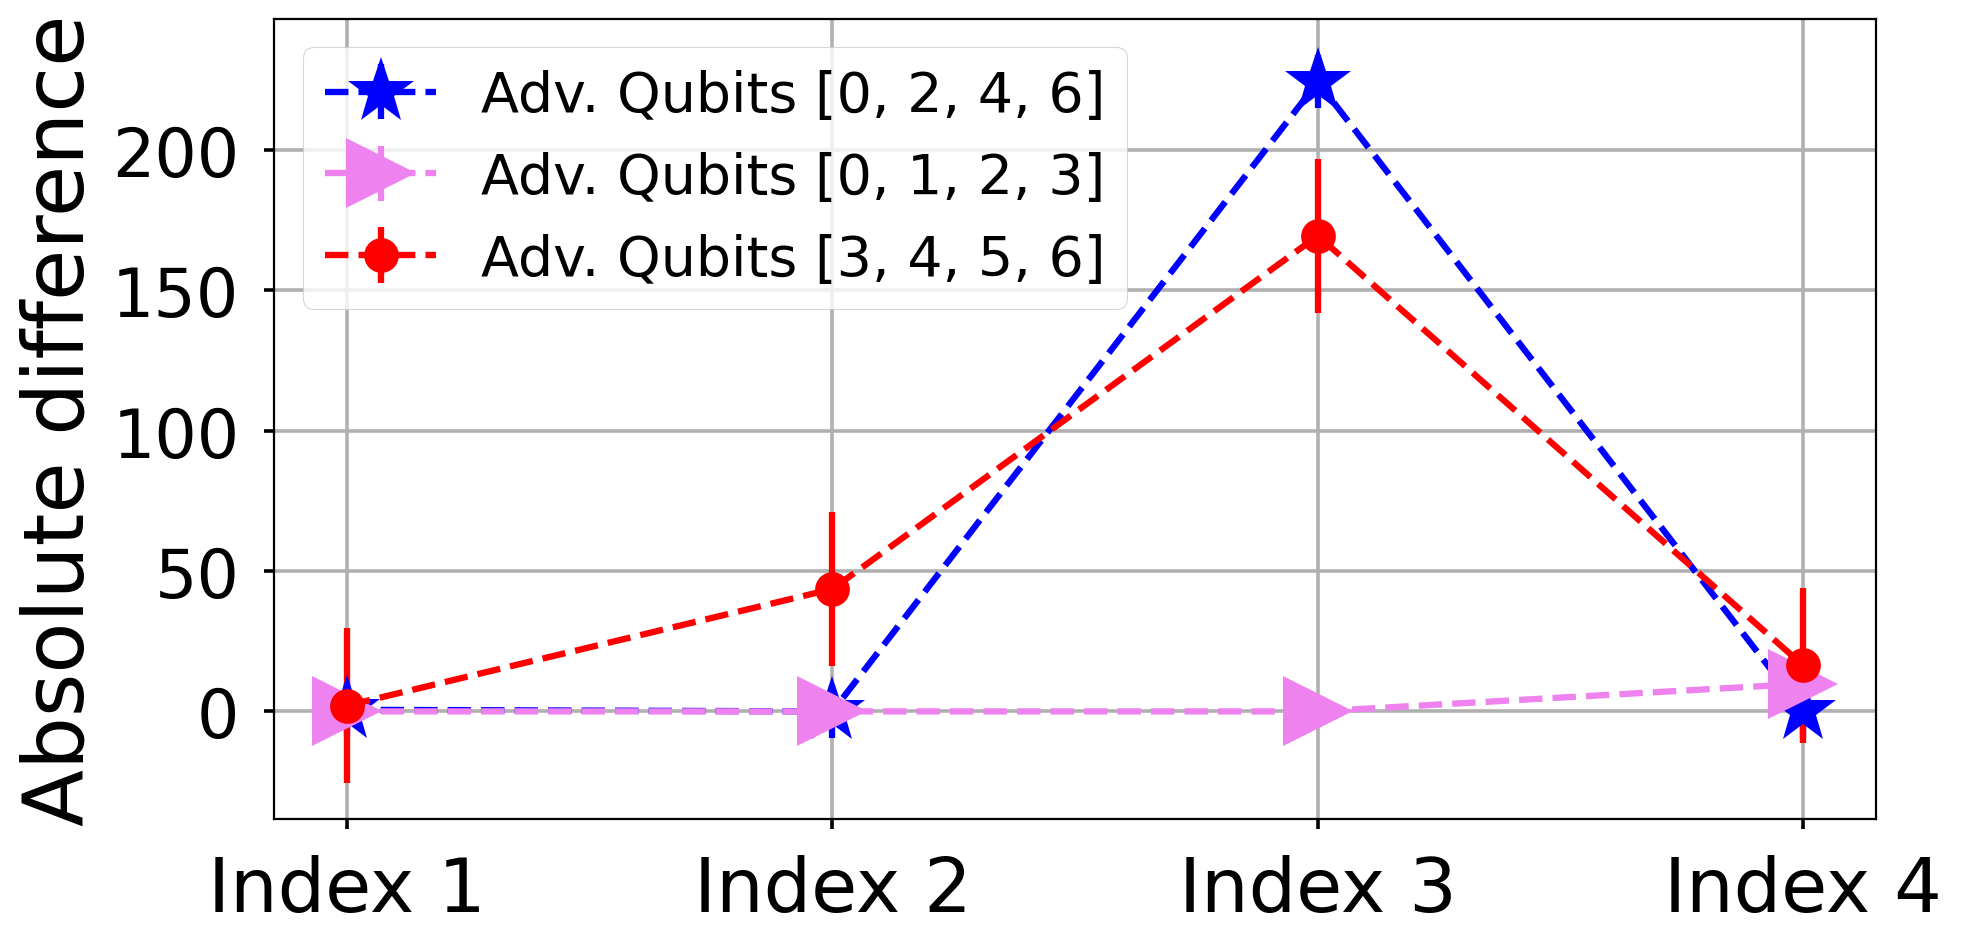

In [717]:
## Figure 7; Compare adversary

colors = ['red', 'blue', 'green', 'orange', 'violet', 'purple', 'black']
markers = ['.', '*', '+', '^', '>', '<', '.']

reference_data = defaultdict(dict)
reference_data_error_bars = defaultdict(dict)
for k in single_CNOT_counts.keys():
    print(f'exp_name: double CNOT comparison on Victim qubits {k}')
    
    snooping_qubits = []
    
    vic_qubs = list(k)
    print(vic_qubs)
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    
    cnot_pos = list(filter(lambda k: k[0] in vic_qubs and k[1] in vic_qubs, cm))
    
    # print(v[2])
    data_single = single_CNOT_counts[k]
    data_double = double_CNOT_counts[k]

    reference_data[k] = []
    reference_data_error_bars[k] = []
    for key in data_single.keys():
        reference_data[k].append(np.abs(np.average(data_single[key]) - np.average(data_double[key])))
        reference_data_error_bars[k].append(np.average(single_CNOT_counts_error_bars[k][key]) + 
                                              np.average(double_CNOT_counts_error_bars[k][key]))
# reference_data_error_bars
print(reference_data)
print(reference_data_error_bars)

plt.figure().set_figheight(5)
# plt.figure().set_figwidth(12)
for key in single_CNOT_counts.keys():  
    snooping_qubits = []
    
    vic_qubs = list(key)
    print(vic_qubs)
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    plt.scatter(range(len(reference_data[key])), reference_data[key], c=colors[key[0]], marker=markers[key[0]])
    plt.errorbar(range(len(reference_data[key])), reference_data[key], 
                    yerr=np.average(reference_data_error_bars[key]), label=f"Adv. Qubits {snooping_qubits}",
                    c=colors[key[0]], fmt ='--', capsize=5,  marker=markers[key[0]], markersize=25)
# plt.title(f"Choosing Adversary qubits set", pad=10)
plt.grid()

plt.legend(ncol=1, loc='upper right', fontsize=20, bbox_to_anchor=(0.55,1))
plt.tight_layout()
# plt.xlabel('Different Snooping Qubits', fontsize=36)
plt.ylabel('Absolute difference', fontsize=30)
plt.xticks([0,1,2,3], ['Index 1','Index 2','Index 3', 'Index 4'], fontsize=27)
plt.yticks(fontsize=24)
plt.subplots_adjust(left=0.15, right=0.92, top=0.95, bottom=0.15)
# reference_data_error_bars
plt.savefig(f"../figures/adversary_qubits_comparison.svg")
plt.savefig(f"../figures/adversary_qubits_comparison.pdf")
plt.show()
plt.close()

exp_name: double CNOT comparison on Victim qubits (1, 3, 5)
[1, 3, 5]
{0: [9868.573333333334, 9864.506666666666, 9869.32, 9867.786666666667], 2: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9522.173333333334, 9523.493333333334, 9518.72, 9524.44], 6: [10000.0, 10000.0, 10000.0, 10000.0]}
{0: [9866.46, 9865.76, 9867.0, 9864.98, 9867.14, 9870.52], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 4: [9748.58, 9746.54, 9743.5, 9749.58, 9740.2, 9749.52], 6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]}
0
2
4
6
[0, 1]
[0, 2]
[0, 3]
[1, 2]
[1, 3]
[2, 3]
0
2
4
6


/var/folders/yq/3cv6zh6d1bn3rphptqpcqdkm0000gn/T/ipykernel_48015/2310542572.py:56: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(range(len(reference_data[key])), reference_data[key],


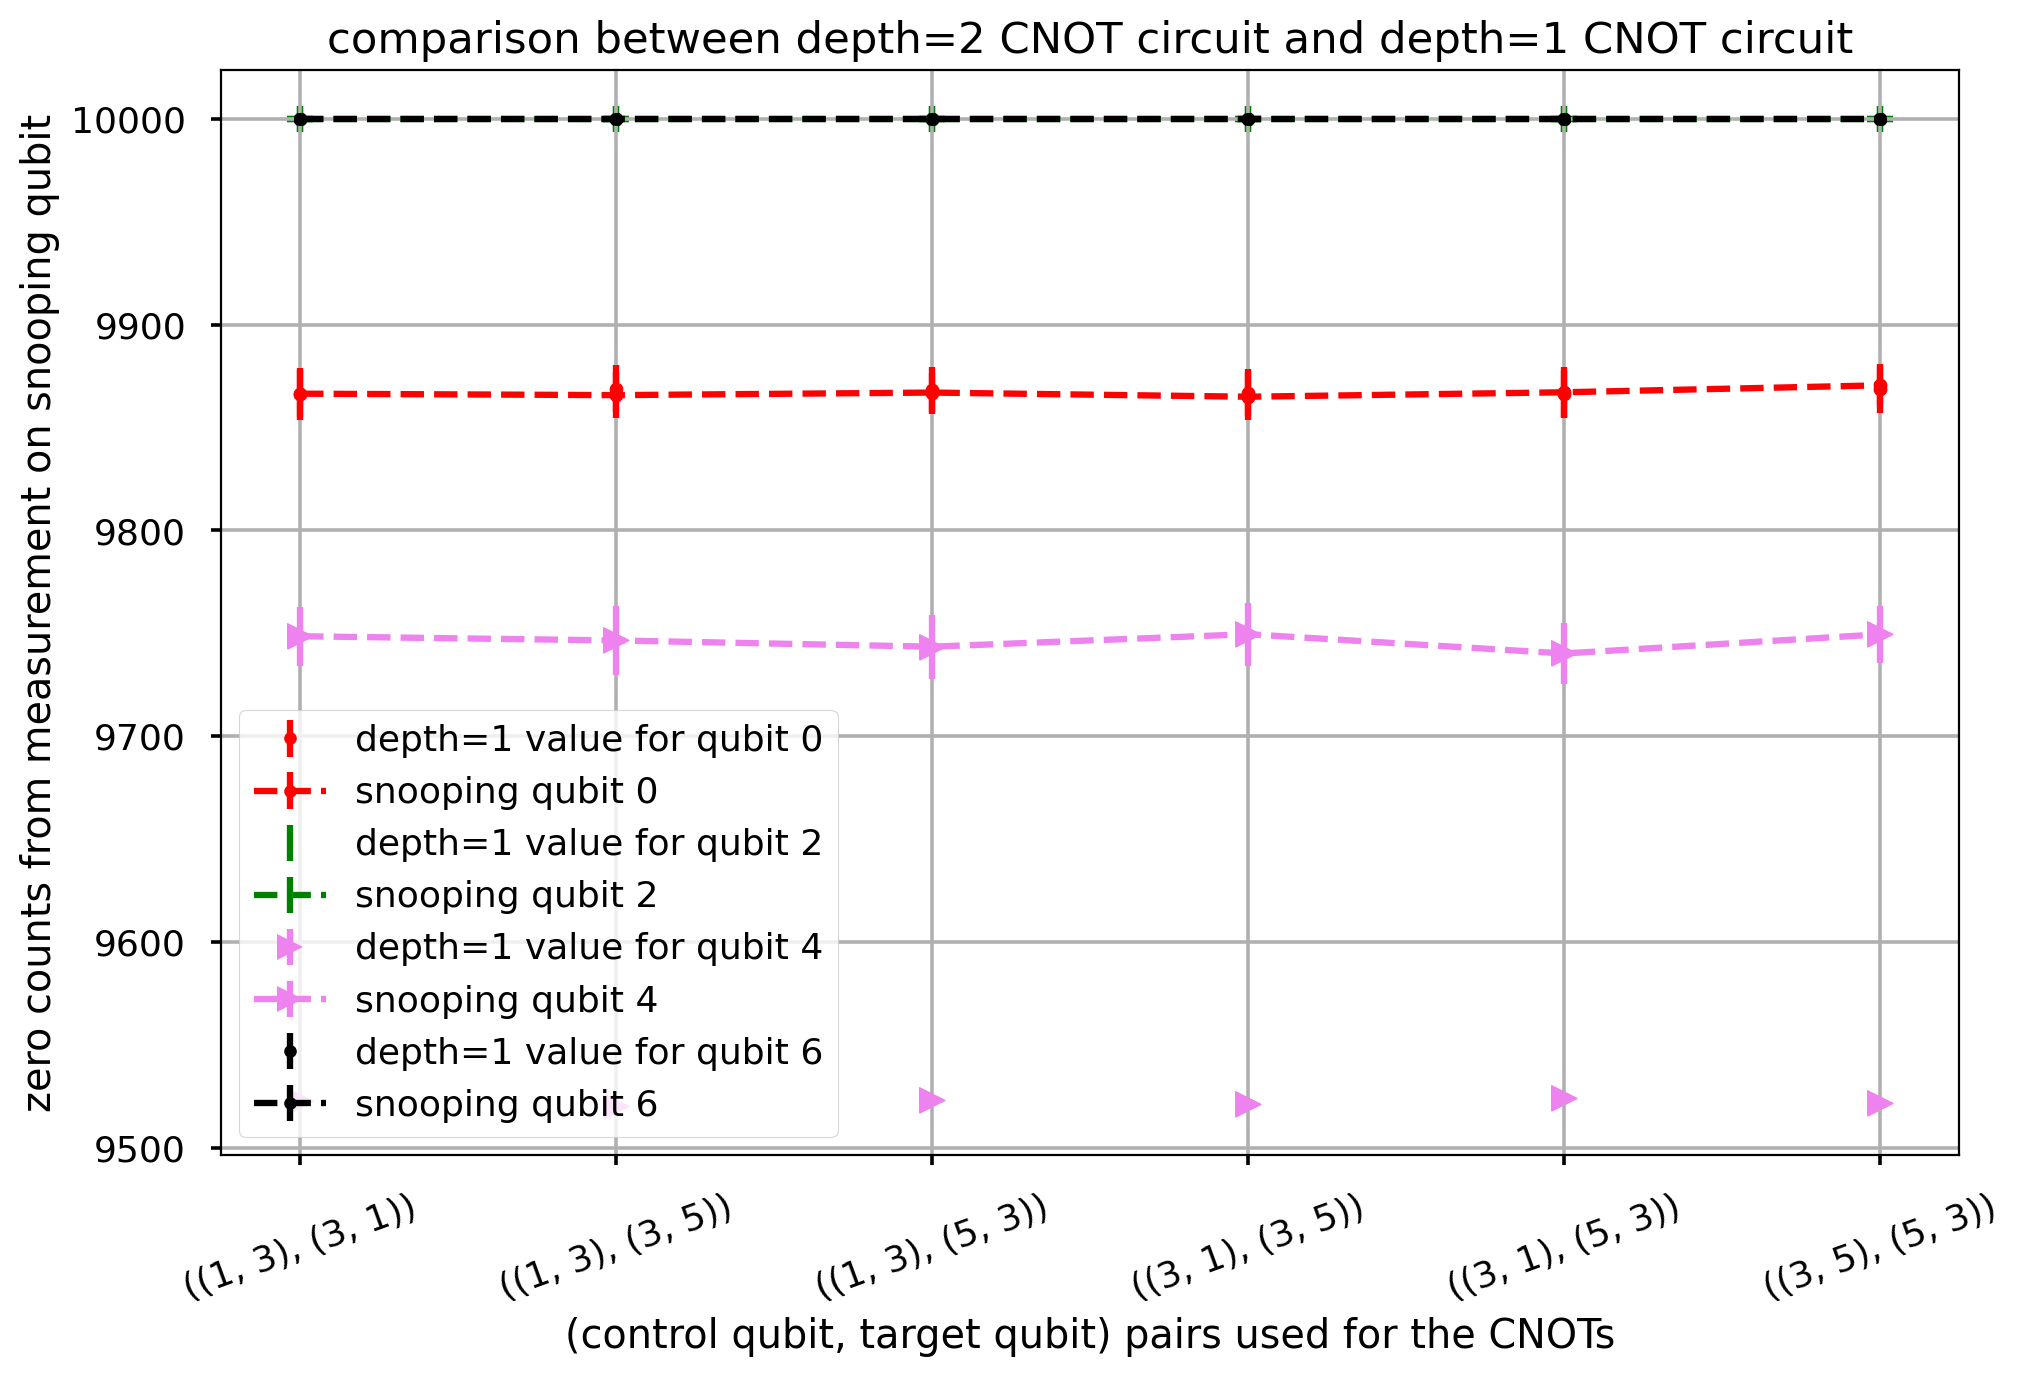

exp_name: double CNOT comparison on Victim qubits (4, 5, 6)
[4, 5, 6]
{0: [10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [9894.36, 9894.68, 9894.546666666667, 9896.146666666667]}
{0: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 3: [9885.16, 9887.5, 9884.9, 9883.4, 9885.92, 9883.74]}
0
1
2
3
[0, 1]
[0, 2]
[0, 3]
[1, 2]
[1, 3]
[2, 3]
0
1
2
3


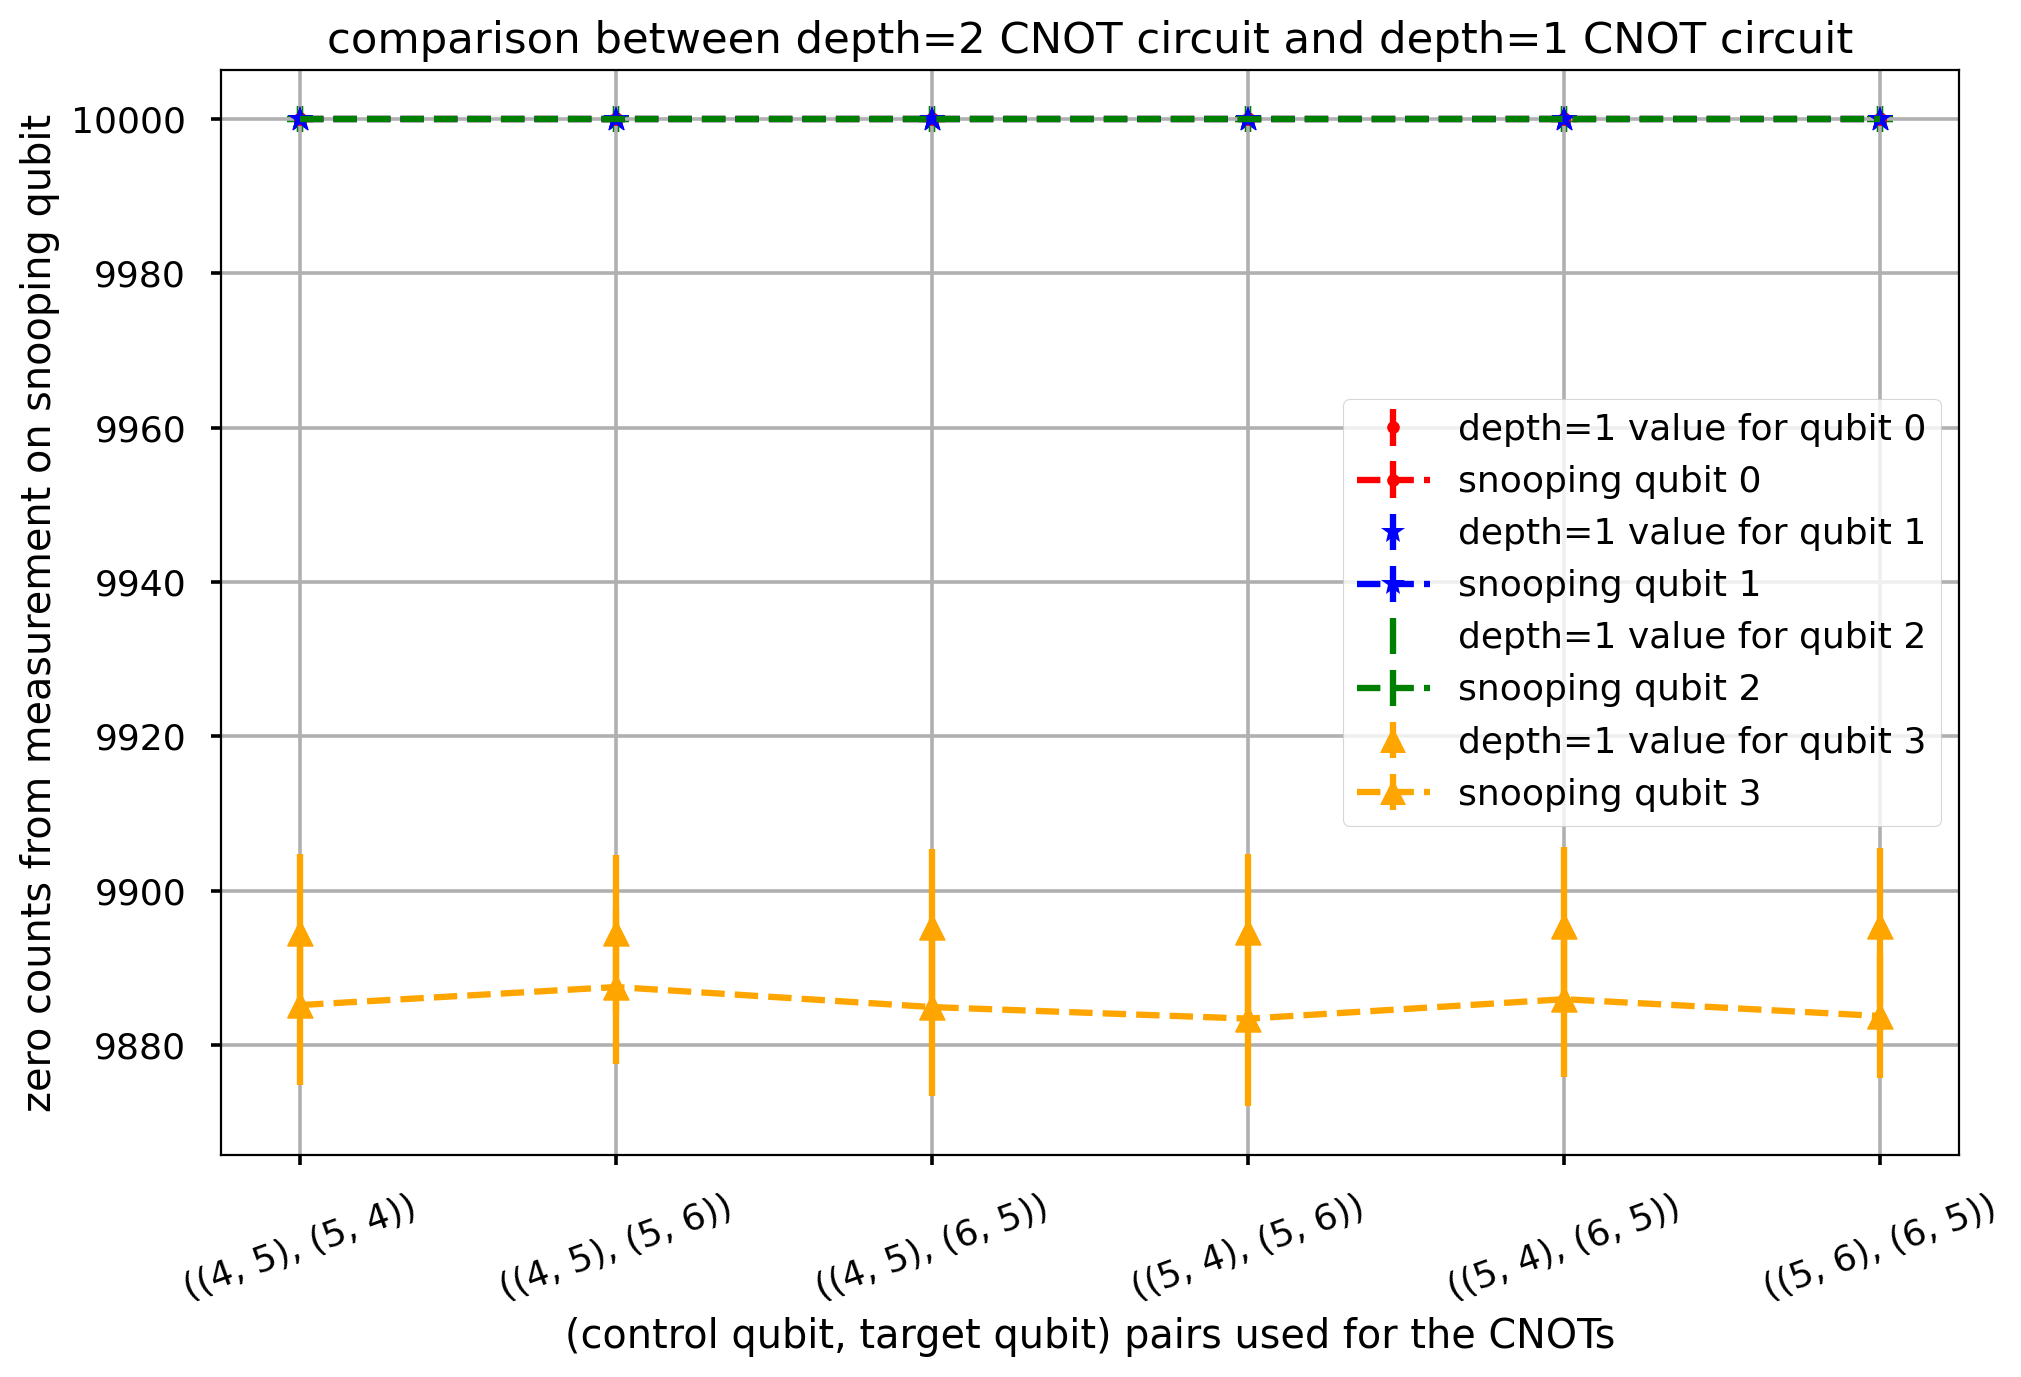

exp_name: double CNOT comparison on Victim qubits (0, 1, 2)
[0, 1, 2]
{3: [9872.693333333333, 9870.653333333334, 9875.613333333333, 9874.48], 4: [9770.973333333333, 9772.373333333333, 9768.626666666667, 9772.226666666667], 5: [9521.12, 9522.346666666666, 9526.893333333333, 9525.76], 6: [9889.04, 9890.96, 9890.013333333334, 9892.053333333333]}
{3: [9869.26, 9871.56, 9872.78, 9870.6, 9869.56, 9873.84], 4: [9813.26, 9816.0, 9816.46, 9816.52, 9811.74, 9813.84], 5: [9697.06, 9691.44, 9691.14, 9690.28, 9697.52, 9692.78], 6: [9875.8, 9872.8, 9872.54, 9875.32, 9874.6, 9873.88]}
3
4
5
6
[0, 1]
[0, 2]
[0, 3]
[1, 2]
[1, 3]
[2, 3]
3
4
5
6


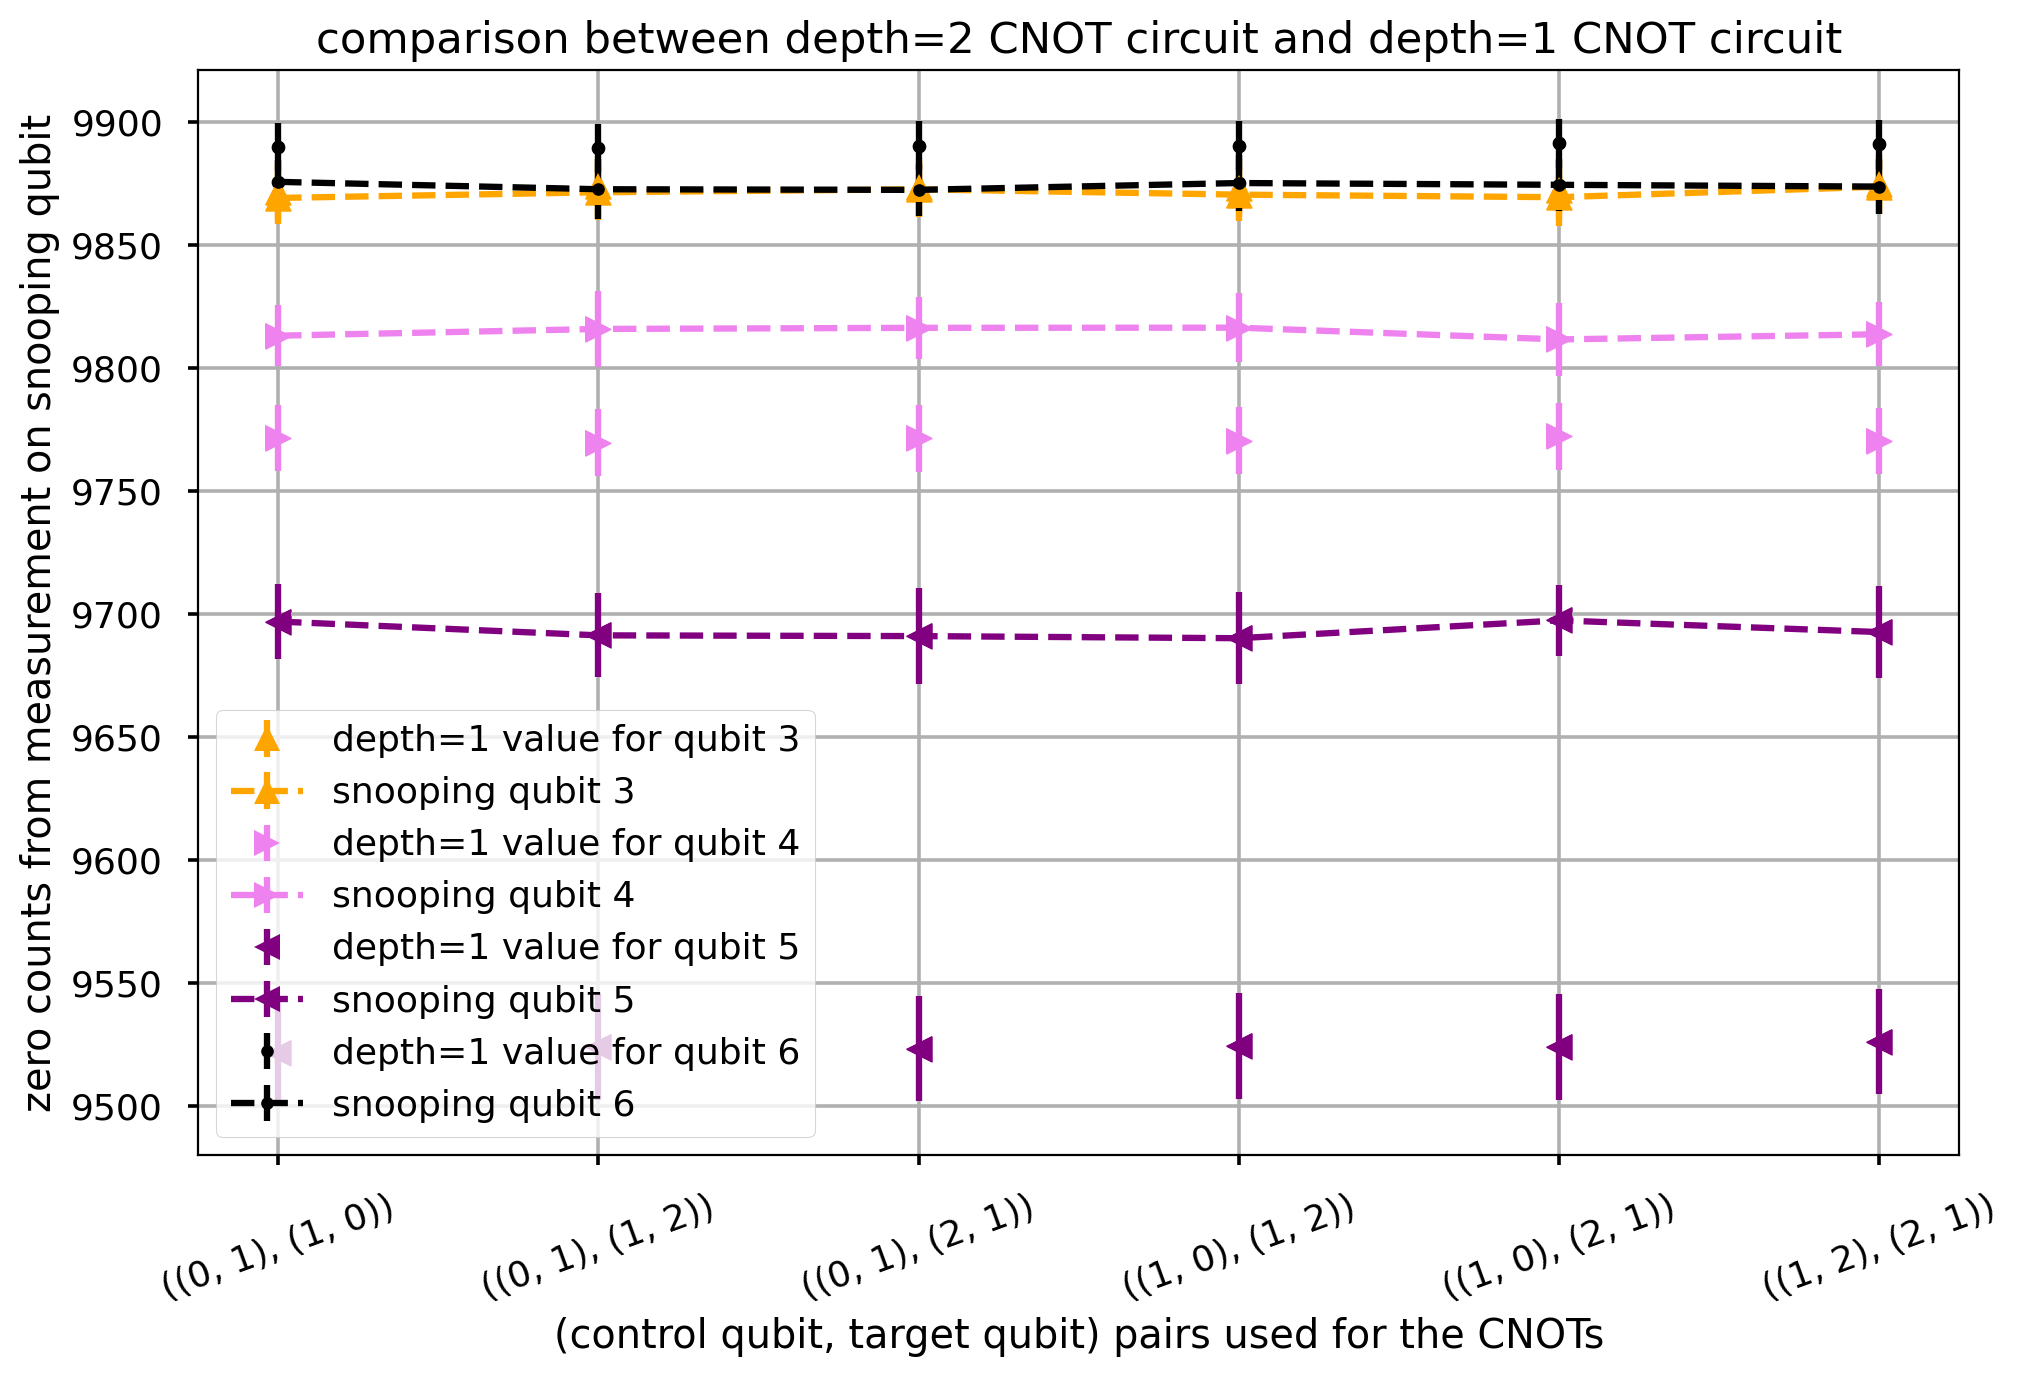

In [527]:
## Figure 5

colors = ['red', 'blue', 'green', 'orange', 'violet', 'purple', 'black']
markers = ['.', '*', '+', '^', '>', '<', '.']
for k in single_CNOT_counts.keys():
    print(f'exp_name: double CNOT comparison on Victim qubits {k}')
    
    snooping_qubits = []
    
    vic_qubs = list(k)
    print(vic_qubs)
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    
    cnot_pos = list(filter(lambda k: k[0] in vic_qubs and k[1] in vic_qubs, cm))
    
    # print(v[2])
    data_single = single_CNOT_counts[k]
    data_double = double_CNOT_counts[k]
    print(data_single)
    print(data_double)
    
    for key in data_single.keys():
        print(key)
    
    single_combs = list(combinations(cnot_pos, 1))
    single_combs = [v[0] for v in single_combs]
    
    double_combs = list(combinations(cnot_pos, 2))
    
    reference_data = defaultdict(list)
    reference_data_error_bars = defaultdict(list)
    for val_comb in double_combs:
        ind_ = []
        for i in range(len(single_combs)):
            if single_combs[i] in val_comb:
                ind_.append(i)
        print(ind_)
        for k_ds in data_single.keys():
            count = 0
            ref_data = 0
            ref_data_error = 0
            for i in ind_:
                ref_data += data_single[k_ds][i]
                ref_data_error += single_CNOT_counts_error_bars[k][k_ds][i]
                count +=1
            reference_data[k_ds].append(ref_data/count)
            reference_data_error_bars[k_ds].append(ref_data_error/count)
    
        
    for key in data_double.keys():
        print(key)
        
        plt.scatter(range(len(reference_data[key])), reference_data[key], c=colors[key], marker=markers[key])
        plt.errorbar(range(len(reference_data[key])), reference_data[key], 
                     yerr=np.average(reference_data_error_bars[key]), label=f"depth=1 value for qubit {key}",
                     c=colors[key], fmt ='o', capsize=5,  marker=markers[key])
        plt.scatter(range(len(data_double[key])), data_double[key], c=colors[key],  marker=markers[key])
        plt.errorbar(range(len(data_double[key])), data_double[key], 
                     yerr=double_CNOT_counts_error_bars[k][key],label=f"Snooping Qubit {key}",
                     c=colors[key], fmt ='--', capsize=5,  marker=markers[key])
        
    combs = list(combinations(cnot_pos, 2))
    # combs = [v[0] for v in combs]
    plt.xticks([0,1,2,3,4,5], list(combs), rotation=20)
    # plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f"comparison between depth=2 CNOT circuit and depth=1 CNOT circuit")
    plt.grid()

    plt.legend()
    plt.tight_layout()
    plt.xlabel('(control qubit, target qubit) pairs used for the CNOTs')
    plt.ylabel('Zero Counts from measurement on Snooping Qubit')
    

    plt.savefig(f"../figures/compare_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.svg")
    plt.savefig(f"../figures/compare_CNOT_vic_qubits{'_'.join(map(str,list(k)))}.pdf")
    plt.show()
    plt.close()

In [63]:


colors = ['red', 'blue', 'green', 'orange', 'violet', 'purple', 'black']
for k,v in job_analysis_data.items():
    print(f'exp_name {k}')
    
    snooping_qubits = []
    
    vic_qubs = list(map(int, k.split('_')))
    print(vic_qubs)
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    cnot_pos = list(filter(lambda k: k[0] in vic_qubs and k[1] in vic_qubs, cm))
    
    # print(v[2])
    data_single = v[0][1]
    data_double = v[1][1]
    print(data_single)
    print(data_double)
    for key in data_single.keys():
        print(key)
        plt.scatter(range(len(data_single[key])), data_single[key], c=colors[key])
        plt.errorbar(range(len(data_single[key])), data_single[key], yerr=v[0][2][key], label=f"{key}-one_CNOT", c=colors[key], fmt ='o')
    combs = list(combinations(cnot_pos, 1))
    plt.xticks([0,1,2,3], combs, rotation=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f"victim qubits single CNOT {k}")
    # plt.show()
    plt.tight_layout()
    plt.savefig(f"victim qubits single CNOT {k}.svg")
    plt.close()
    
    
    for key in data_single.keys():
        print(key)
        plt.scatter(range(len(data_double[key])), data_double[key], c=colors[key])
        plt.errorbar(range(len(data_double[key])), data_double[key], yerr=v[1][2][key], label=f"{key}-two_CNOT", c=colors[key])
    combs = list(combinations(cnot_pos, 2))
    plt.xticks([0,1,2,3,4,5], combs, rotation=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f"victim qubits double CNOT {k}")
    # plt.show()
    plt.tight_layout()
    plt.savefig(f"victim qubits double CNOT {k}.svg")
    plt.close()
    
    for key in data_single.keys():
        print(key)
        plt.scatter(range(len(data_single[key])), data_single[key], c=colors[key])
        plt.errorbar(range(len(data_single[key])), data_single[key], yerr=v[0][2][key], label=f"{key}-one_CNOT", c=colors[key], fmt ='o')
        plt.scatter(range(len(data_double[key])), data_double[key], c=colors[key])
        plt.errorbar(range(len(data_double[key])), data_double[key], yerr=v[1][2][key], label=f"{key}-two_CNOT", c=colors[key])
         
    # locs, labels = plt.xticks()
    plt.xticks([0,1,2,3,4,5], combs, rotation=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f"victim qubits comparison {k}")
    # plt.show()
    plt.tight_layout()
    plt.savefig(f"victim qubits comparison {k}.svg")
    plt.close()

NameError: name 'job_analysis_data' is not defined

In [ ]:
#data
# 1_3_5
# 2
# [0, 2, 3, 4, 6]
# defaultdict(<class 'list'>, {0: [9868.573333333334, 9864.506666666666, 9869.32, 9867.786666666667], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [9522.173333333334, 9523.493333333334, 9518.72, 9524.44], 4: [10000.0, 10000.0, 10000.0, 10000.0], 6: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [9.659776855025632, 11.819050535282248, 11.88854911248635, 12.20305244145451], 2: [0.0, 0.0, 0.0, 0.0], 3: [22.498813795892044, 23.343449235753962, 22.744118653694482, 20.484947319108894], 4: [0.0, 0.0, 0.0, 0.0], 6: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [9866.6, 9868.133333333333, 9867.133333333333, 9866.04], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [9744.106666666667, 9746.906666666666, 9744.08, 9750.186666666666], 4: [10000.0, 10000.0, 10000.0, 10000.0], 6: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [11.35957745693034, 10.288288919392228, 11.667999923818229, 12.094560760937124], 2: [0.0, 0.0, 0.0, 0.0], 3: [14.964467544449715, 15.583900524437247, 15.75035237701049, 15.281966132958443], 4: [0.0, 0.0, 0.0, 0.0], 6: [0.0, 0.0, 0.0, 0.0]})
# 4_5_6
# 2
# [0, 2, 3, 4, 5]
# defaultdict(<class 'list'>, {0: [10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9894.36, 9894.68, 9894.546666666667, 9896.146666666667], 5: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [0.0, 0.0, 0.0, 0.0], 2: [0.0, 0.0, 0.0, 0.0], 3: [0.0, 0.0, 0.0, 0.0], 4: [10.279610887577409, 11.623149315052267, 9.992388214146917, 8.81921135300027], 5: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9884.44, 9884.506666666666, 9886.213333333333, 9885.253333333334], 5: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [0.0, 0.0, 0.0, 0.0], 2: [0.0, 0.0, 0.0, 0.0], 3: [0.0, 0.0, 0.0, 0.0], 4: [11.07337949017071, 9.657292005986402, 10.189266683896127, 10.343556233498976], 5: [0.0, 0.0, 0.0, 0.0]})
# 0_1_2
# 2
# [0, 3, 4, 5, 6]
# defaultdict(<class 'list'>, {0: [9872.693333333333, 9870.653333333334, 9875.613333333333, 9874.48], 3: [9770.973333333333, 9772.373333333333, 9768.626666666667, 9772.226666666667], 4: [9521.12, 9522.346666666666, 9526.893333333333, 9525.76], 5: [9889.04, 9890.96, 9890.013333333334, 9892.053333333333], 6: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [13.289568172902467, 11.952677059508003, 11.83879873786, 10.126348469874683], 3: [14.20326097141858, 12.122456663381213, 15.4175426778142, 12.572534439094696], 4: [21.555484994157133, 22.426468489017367, 21.60652576319376, 20.377660971433073], 5: [8.592151457386366, 9.975222637448583, 10.25734641881396, 10.72553754156665], 6: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [9870.466666666667, 9873.066666666668, 9870.6, 9870.933333333332], 3: [9811.053333333333, 9814.88, 9816.586666666666, 9816.026666666667], 4: [9694.546666666667, 9689.493333333334, 9695.933333333332, 9693.506666666666], 5: [9874.36, 9870.906666666666, 9874.266666666666, 9877.093333333334], 6: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [11.097547276563212, 11.396295694459473, 11.775681155103795, 10.877908295664607], 3: [14.034142494486636, 14.150580671242201, 12.404400652814932, 14.479386113444944], 4: [17.799845192834933, 18.680737553842874, 15.613953873236447, 17.53273002764322], 5: [8.918355603286216, 10.715936211497757, 11.281055900146148, 11.620870114678256], 6: [0.0, 0.0, 0.0, 0.0]})
# 5_3_1
# 2
# [0, 2, 3, 4, 5, 6]
# defaultdict(<class 'list'>, {0: [9863.106666666667, 9862.56, 9862.88, 9863.76], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [9647.586666666666, 9652.24, 9645.946666666667, 9651.293333333333], 4: [10000.0, 10000.0, 10000.0, 10000.0], 5: [0.0, 0.0, 0.0, 0.0], 6: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [11.921491331018764, 11.702125163120302, 11.75296841936822, 12.543088402250328], 2: [0.0, 0.0, 0.0, 0.0], 3: [16.784193622439997, 18.047965721007635, 18.093750916330816, 19.15116938698232], 4: [0.0, 0.0, 0.0, 0.0], 5: [0.0, 0.0, 0.0, 0.0], 6: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [9864.413333333334, 9862.866666666667, 9864.626666666667, 9862.746666666666], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [9682.773333333333, 9657.96, 9683.053333333333, 9655.16], 4: [10000.0, 10000.0, 10000.0, 10000.0], 5: [0.0, 0.0, 0.0, 0.0], 6: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [10.751859787445559, 11.536993638822127, 9.967645436890077, 11.858154250228921], 2: [0.0, 0.0, 0.0, 0.0], 3: [22.702465847470307, 20.11330571205705, 17.288835189862333, 18.312138051030523], 4: [0.0, 0.0, 0.0, 0.0], 5: [0.0, 0.0, 0.0, 0.0], 6: [0.0, 0.0, 0.0, 0.0]})

In [ ]:
# 1_3_5
# 2
# [0, 2, 4, 6]
# defaultdict(<class 'list'>, {0: [9868.573333333334, 9864.506666666666, 9869.32, 9867.786666666667], 2: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9522.173333333334, 9523.493333333334, 9518.72, 9524.44], 6: [10000.0, 10000.0, 10000.0, 10000.0]})
# defaultdict(<class 'list'>, {0: [9.659776855025632, 11.819050535282248, 11.88854911248635, 12.20305244145451], 2: [0.0, 0.0, 0.0, 0.0], 4: [22.498813795892044, 23.343449235753962, 22.744118653694482, 20.484947319108894], 6: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [9866.46, 9865.76, 9867.0, 9864.98, 9867.14, 9870.52], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 4: [9748.58, 9746.54, 9743.5, 9749.58, 9740.2, 9749.52], 6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]})
# defaultdict(<class 'list'>, {0: [12.601920488560465, 11.325299113047743, 9.664367542679656, 11.446379340210598, 12.06318365938279, 10.20831034011016], 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 4: [14.225456055958277, 16.966095602701287, 15.608010763707206, 15.269695478299493, 15.046594299043223, 13.986050192960127], 6: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]})
# 4_5_6
# 2
# [0, 1, 2, 3]
# defaultdict(<class 'list'>, {0: [10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0], 3: [9894.36, 9894.68, 9894.546666666667, 9896.146666666667]})
# defaultdict(<class 'list'>, {0: [0.0, 0.0, 0.0, 0.0], 1: [0.0, 0.0, 0.0, 0.0], 2: [0.0, 0.0, 0.0, 0.0], 3: [10.279610887577409, 11.623149315052267, 9.992388214146917, 8.81921135300027]})
# defaultdict(<class 'list'>, {0: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 1: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 3: [9885.16, 9887.5, 9884.9, 9883.4, 9885.92, 9883.74]})
# defaultdict(<class 'list'>, {0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 3: [10.335105224428052, 9.930256794262673, 11.475626344561764, 11.278297743897348, 10.146605343660509, 8.039427840337893]})
# 0_1_2
# 2
# [3, 4, 5, 6]
# defaultdict(<class 'list'>, {3: [9872.693333333333, 9870.653333333334, 9875.613333333333, 9874.48], 4: [9770.973333333333, 9772.373333333333, 9768.626666666667, 9772.226666666667], 5: [9521.12, 9522.346666666666, 9526.893333333333, 9525.76], 6: [9889.04, 9890.96, 9890.013333333334, 9892.053333333333]})
# defaultdict(<class 'list'>, {3: [13.289568172902467, 11.952677059508003, 11.83879873786, 10.126348469874683], 4: [14.20326097141858, 12.122456663381213, 15.4175426778142, 12.572534439094696], 5: [21.555484994157133, 22.426468489017367, 21.60652576319376, 20.377660971433073], 6: [8.592151457386366, 9.975222637448583, 10.25734641881396, 10.72553754156665]})
# defaultdict(<class 'list'>, {3: [9869.26, 9871.56, 9872.78, 9870.6, 9869.56, 9873.84], 4: [9813.26, 9816.0, 9816.46, 9816.52, 9811.74, 9813.84], 5: [9697.06, 9691.44, 9691.14, 9690.28, 9697.52, 9692.78], 6: [9875.8, 9872.8, 9872.54, 9875.32, 9874.6, 9873.88]})
# defaultdict(<class 'list'>, {3: [10.701046677778768, 11.458027753501037, 11.386465650060163, 10.838819123871383, 11.872927187513618, 11.018820263530937], 4: [12.409367429486483, 15.585891055695212, 12.62253540300046, 14.129741681998295, 14.975727027426748, 13.008243540155604], 5: [15.339374172370919, 17.075315516850633, 19.41031684440004, 18.693357108876942, 14.318156305893579, 18.774759652256535], 6: [8.863407922464136, 12.222929272478016, 10.581512179268142, 11.223974340669173, 10.68831137270991, 11.17790678078861]})
# 5_3_1
# 2
# [0, 2, 4, 6]
# defaultdict(<class 'list'>, {0: [9863.106666666667, 9862.56, 9862.88, 9863.76], 2: [10000.0, 10000.0, 10000.0, 10000.0], 4: [9647.586666666666, 9652.24, 9645.946666666667, 9651.293333333333], 6: [10000.0, 10000.0, 10000.0, 10000.0]})
# defaultdict(<class 'list'>, {0: [11.921491331018764, 11.702125163120302, 11.75296841936822, 12.543088402250328], 2: [0.0, 0.0, 0.0, 0.0], 4: [16.784193622439997, 18.047965721007635, 18.093750916330816, 19.15116938698232], 6: [0.0, 0.0, 0.0, 0.0]})
# defaultdict(<class 'list'>, {0: [9863.84, 9862.28, 9864.66, 9863.2, 9865.06, 9862.94], 2: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0], 4: [9694.46, 9661.24, 9678.18, 9659.4, 9676.1, 9649.04], 6: [10000.0, 10000.0, 10000.0, 10000.0, 10000.0, 10000.0]})
# defaultdict(<class 'list'>, {0: [9.996719461903488, 10.459521977604904, 10.651966954511265, 13.392535234226568, 10.40655562614259, 11.017095806064319], 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 4: [22.24428915474711, 20.15892854295585, 17.2205574822652, 17.9510445378535, 15.1, 17.33662020118108], 6: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]})

In [ ]:
colors = ['red', 'blue', 'green', 'orange', 'violet', 'purple', 'black']
for k,v in job_analysis_data.items():
    print(f'exp_name {k}')
    
    snooping_qubits = []
    
    vic_qubs = list(map(int, k.split('_')))
    print(vic_qubs)
    for qub in range(7):
        if qub not in vic_qubs:
            snooping_qubits.append(qub)
    cnot_pos = list(filter(lambda k: k[0] in vic_qubs and k[1] in vic_qubs, cm))
    
    # print(v[2])
    data_single = v[0][1]
    data_double = v[1][1]
    print(data_single)
    print(data_double)
    for key in data_single.keys():
        print(key)
        plt.scatter(range(len(data_single[key])), data_single[key], c=colors[key])
        plt.errorbar(range(len(data_single[key])), data_single[key], yerr=v[0][2][key], label=f"{key}-one_CNOT", c=colors[key], fmt ='o')
    combs = list(combinations(cnot_pos, 1))
    plt.xticks([0,1,2,3], combs, rotation=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f"victim qubits single CNOT {k}")
    # plt.show()
    plt.tight_layout()
    plt.savefig(f"victim qubits single CNOT {k}.svg")
    plt.close()
    
    
    for key in data_single.keys():
        print(key)
        plt.scatter(range(len(data_double[key])), data_double[key], c=colors[key])
        plt.errorbar(range(len(data_double[key])), data_double[key], yerr=v[1][2][key], label=f"{key}-two_CNOT", c=colors[key])
    combs = list(combinations(cnot_pos, 2))
    plt.xticks([0,1,2,3,4,5], combs, rotation=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f"victim qubits double CNOT {k}")
    # plt.show()
    plt.tight_layout()
    plt.savefig(f"victim qubits double CNOT {k}.svg")
    plt.close()
    
    for key in data_single.keys():
        print(key)
        plt.scatter(range(len(data_single[key])), data_single[key], c=colors[key])
        plt.errorbar(range(len(data_single[key])), data_single[key], yerr=v[0][2][key], label=f"{key}-one_CNOT", c=colors[key], fmt ='o')
        plt.scatter(range(len(data_double[key])), data_double[key], c=colors[key])
        plt.errorbar(range(len(data_double[key])), data_double[key], yerr=v[1][2][key], label=f"{key}-two_CNOT", c=colors[key])
         
    # locs, labels = plt.xticks()
    plt.xticks([0,1,2,3,4,5], combs, rotation=20)
    plt.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
    plt.title(f"victim qubits comparison {k}")
    # plt.show()
    plt.tight_layout()
    plt.savefig(f"victim qubits comparison {k}.svg")
    plt.close()